<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/Anatica_II_U1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 1


# Limpieza de datos y transformaciones

In [ ]:
# Librerias basicas
import pandas as pd
import numpy as np

# datasets de scikit learns
# URL: https://scikit-learn.org/stable/datasets.html
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


#librerias para graficar
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.display import HTML, IFrame,display_html

## 1-	Extracción y lectura de datos

In [ ]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/Analítica II/data/Internet_fijo_N_mero_de_suscriptores_Los.csv', decimal= ",")

In [ ]:
print(data.head(12))
print(data.shape)

     AÑO  TRIMESTRE        DEPARTAMENTO   MUNICIPIO  \
0   2019          2  NORTE DE SANTANDER  LOS PATIOS   
1   2019          3  NORTE DE SANTANDER  LOS PATIOS   
2   2019          1  NORTE DE SANTANDER  LOS PATIOS   
3   2019          4  NORTE DE SANTANDER  LOS PATIOS   
4   2018          4  NORTE DE SANTANDER  LOS PATIOS   
5   2020          1  NORTE DE SANTANDER  LOS PATIOS   
6   2018          3  NORTE DE SANTANDER  LOS PATIOS   
7   2020          4  NORTE DE SANTANDER  LOS PATIOS   
8   2020          2  NORTE DE SANTANDER  LOS PATIOS   
9   2021          1  NORTE DE SANTANDER  LOS PATIOS   
10  2020          3  NORTE DE SANTANDER  LOS PATIOS   
11  2018          2  NORTE DE SANTANDER  LOS PATIOS   

    No. ACCESOS FIJOS A INTERNET  POBLACIÓN DANE  INDICE  
0                          12243           93754  0.1306  
1                          12754           93754  0.1360  
2                          12068           93754  0.1287  
3                          12992           93754

In [ ]:
data.convert_dtypes().dtypes

AÑO                               Int64
TRIMESTRE                         Int64
DEPARTAMENTO                     string
MUNICIPIO                        string
No. ACCESOS FIJOS A INTERNET      Int64
POBLACIÓN DANE                    Int64
INDICE                          Float64
dtype: object

## EDA

### Análisis estadístico descriptivo


In [ ]:
data.describe()

AÑO  TRIMESTRE  No. ACCESOS FIJOS A INTERNET  POBLACIÓN DANE  \
count    12.000000  12.000000                     12.000000       12.000000   
mean   2019.250000   2.500000                  13463.083333    94144.833333   
std       0.965307   1.167748                   1916.911079     3498.500298   
min    2018.000000   1.000000                  11334.000000    89091.000000   
25%    2018.750000   1.750000                  11971.750000    92588.250000   
50%    2019.000000   2.500000                  12873.000000    93754.000000   
75%    2020.000000   3.250000                  15066.500000    97220.000000   
max    2021.000000   4.000000                  16974.000000    98569.000000   

          INDICE  
count  12.000000  
mean    0.142567  
std     0.015641  
min     0.127200  
25%     0.130375  
50%     0.137300  
75%     0.154950  
max     0.172200

In [ ]:
data['indice_inv'] = data['POBLACIÓN DANE']/data['No. ACCESOS FIJOS A INTERNET']

### Análisis estadistico de correlaciones


In [ ]:
data.corr().style.background_gradient(cmap='coolwarm', axis=1)

### Análisis contextual

Text(0.5, 0, 'Tiempo')

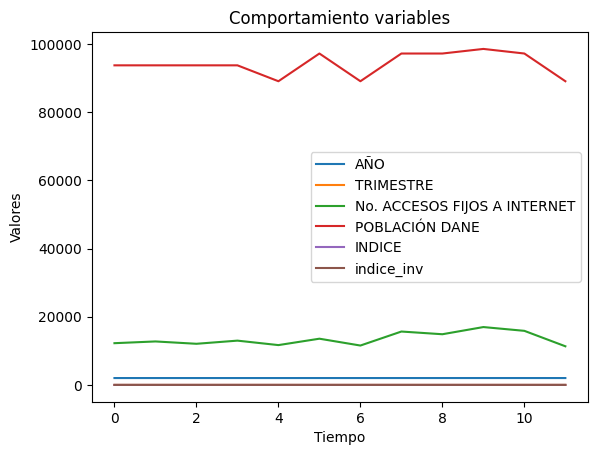

In [ ]:
fig = data.plot()
plt.title('Comportamiento variables')
fig.set_ylabel('Valores')
fig.set_xlabel('Tiempo')

Como no hay una columna de fechas vamos a hacer las transformaciones necesarias para crearla

In [ ]:
data

AÑO  TRIMESTRE        DEPARTAMENTO   MUNICIPIO  \
0   2019          2  NORTE DE SANTANDER  LOS PATIOS   
1   2019          3  NORTE DE SANTANDER  LOS PATIOS   
2   2019          1  NORTE DE SANTANDER  LOS PATIOS   
3   2019          4  NORTE DE SANTANDER  LOS PATIOS   
4   2018          4  NORTE DE SANTANDER  LOS PATIOS   
5   2020          1  NORTE DE SANTANDER  LOS PATIOS   
6   2018          3  NORTE DE SANTANDER  LOS PATIOS   
7   2020          4  NORTE DE SANTANDER  LOS PATIOS   
8   2020          2  NORTE DE SANTANDER  LOS PATIOS   
9   2021          1  NORTE DE SANTANDER  LOS PATIOS   
10  2020          3  NORTE DE SANTANDER  LOS PATIOS   
11  2018          2  NORTE DE SANTANDER  LOS PATIOS   

    No. ACCESOS FIJOS A INTERNET  POBLACIÓN DANE  INDICE  indice_inv  
0                          12243           93754  0.1306    7.657764  
1                          12754           93754  0.1360    7.350949  
2                          12068           93754  0.1287    7.768810  
3                          12992           93754  0.1386    7.216287  
4                          11683           89091  0.1311    7.625695  
5                          13560           97220  0.1395    7.169617  
6                          11554           89091  0.1297    7.710836  
7                          15662           97220  0.1611    6.207381  
8                          14868           97220  0.1529    6.538875  
9                          16974           98569  0.1722    5.807058  
10                         15865           97220  0.1632    6.127955  
11                         11334           89091  0.1272    7.860508

In [ ]:
#Operaciones de texto para obtener fechas:
#En este ejemplo se recorre cada fila data frame, recueprando el dato de año
# y de trimestre para despues adaptarlos y crear un formato Año-Trimestre y
# almacenarlo en dos columnas una como categoria creada desde string
# y la categoria creada desde comando de transofmración de fecha

fechas_cat = []
fecha = []
for i in data.index:
  año = data.iloc[i]['AÑO']
  trimestre  = data.iloc[i]['TRIMESTRE']
  # estructurar como categoria
  fecha_cat_temp = '''{0}Q{1}'''.format(str(año),str(trimestre))
  fechas_cat.append(fecha_cat_temp)
  # estructurar desde función de periodo
  fecha_temp = pd.Period(year=int(año), quarter = trimestre, freq= 'Q').strftime('%yQ%q')
  fecha.append(fecha_temp)

data['fechas_cat'] = fechas_cat
data['fechas'] = fecha



In [ ]:
 data.dtypes

AÑO                               int64
TRIMESTRE                         int64
DEPARTAMENTO                     object
MUNICIPIO                        object
No. ACCESOS FIJOS A INTERNET      int64
POBLACIÓN DANE                    int64
INDICE                          float64
indice_inv                      float64
fechas_cat                       object
fechas                           object
dtype: object

In [ ]:
data

AÑO  TRIMESTRE        DEPARTAMENTO   MUNICIPIO  \
0   2019          2  NORTE DE SANTANDER  LOS PATIOS   
1   2019          3  NORTE DE SANTANDER  LOS PATIOS   
2   2019          1  NORTE DE SANTANDER  LOS PATIOS   
3   2019          4  NORTE DE SANTANDER  LOS PATIOS   
4   2018          4  NORTE DE SANTANDER  LOS PATIOS   
5   2020          1  NORTE DE SANTANDER  LOS PATIOS   
6   2018          3  NORTE DE SANTANDER  LOS PATIOS   
7   2020          4  NORTE DE SANTANDER  LOS PATIOS   
8   2020          2  NORTE DE SANTANDER  LOS PATIOS   
9   2021          1  NORTE DE SANTANDER  LOS PATIOS   
10  2020          3  NORTE DE SANTANDER  LOS PATIOS   
11  2018          2  NORTE DE SANTANDER  LOS PATIOS   

    No. ACCESOS FIJOS A INTERNET  POBLACIÓN DANE  INDICE  indice_inv  \
0                          12243           93754  0.1306    7.657764   
1                          12754           93754  0.1360    7.350949   
2                          12068           93754  0.1287    7.768810   
3                          12992           93754  0.1386    7.216287   
4                          11683           89091  0.1311    7.625695   
5                          13560           97220  0.1395    7.169617   
6                          11554           89091  0.1297    7.710836   
7                          15662           97220  0.1611    6.207381   
8                          14868           97220  0.1529    6.538875   
9                          16974           98569  0.1722    5.807058   
10                         15865           97220  0.1632    6.127955   
11                         11334           89091  0.1272    7.860508   

   fechas_cat fechas  
0      2019Q2   19Q2  
1      2019Q3   19Q3  
2      2019Q1   19Q1  
3      2019Q4   19Q4  
4      2018Q4   18Q4  
5      2020Q1   20Q1  
6      2018Q3   18Q3  
7      2020Q4   20Q4  
8      2020Q2   20Q2  
9      2021Q1   21Q1  
10     2020Q3   20Q3  
11     2018Q2   18Q2

In [ ]:
data.groupby('fechas').mean()

AÑO  TRIMESTRE  No. ACCESOS FIJOS A INTERNET  POBLACIÓN DANE  \
fechas                                                                    
18Q2    2018.0        2.0                       11334.0         89091.0   
18Q3    2018.0        3.0                       11554.0         89091.0   
18Q4    2018.0        4.0                       11683.0         89091.0   
19Q1    2019.0        1.0                       12068.0         93754.0   
19Q2    2019.0        2.0                       12243.0         93754.0   
19Q3    2019.0        3.0                       12754.0         93754.0   
19Q4    2019.0        4.0                       12992.0         93754.0   
20Q1    2020.0        1.0                       13560.0         97220.0   
20Q2    2020.0        2.0                       14868.0         97220.0   
20Q3    2020.0        3.0                       15865.0         97220.0   
20Q4    2020.0        4.0                       15662.0         97220.0   
21Q1    2021.0        1.0                       16974.0         98569.0   

        INDICE  indice_inv  
fechas                      
18Q2    0.1272    7.860508  
18Q3    0.1297    7.710836  
18Q4    0.1311    7.625695  
19Q1    0.1287    7.768810  
19Q2    0.1306    7.657764  
19Q3    0.1360    7.350949  
19Q4    0.1386    7.216287  
20Q1    0.1395    7.169617  
20Q2    0.1529    6.538875  
20Q3    0.1632    6.127955  
20Q4    0.1611    6.207381  
21Q1    0.1722    5.807058

Text(0.5, 0, 'Trimestre')

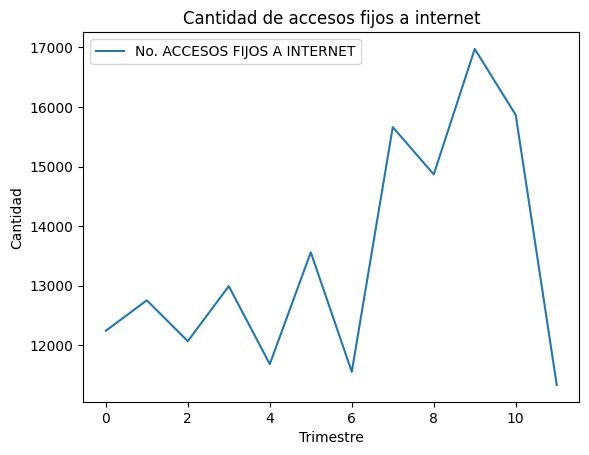

In [ ]:
fig = data[['fechas','No. ACCESOS FIJOS A INTERNET']].plot()
plt.title('Cantidad de accesos fijos a internet')
fig.set_ylabel('Cantidad')
fig.set_xlabel('Trimestre')

# Segundo ejemplo EDA

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/vinitvaidya/StudentMentalHealthAnalysis/main/Student%20Mental%20health.csv')
data2.head()

Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes                        No   
2                     Yes                  Yes                       Yes   
3                     Yes                   No                        No   
4                      No                   No                        No   

  Did you seek any specialist for a treatment?  
0                                           No  
1                                           No  
2                                           No  
3                                           No  
4                                           No

In [ ]:
#conversiones de fecha
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])

## Manejo de tablas

In [ ]:
group_vars = ['Choose your gender','What is your course?','Do you have Depression?']
analyzed_vars = ['Age']

data2[group_vars+analyzed_vars].groupby(group_vars).agg(['count','mean','std'])

Age         \
                                                                count   mean   
Choose your gender What is your course? Do you have Depression?                
Female             ALA                  Yes                         1  23.00   
                   Accounting           No                          1  24.00   
                   BCS                  No                          8  20.75   
                                        Yes                         3  20.00   
                   BENL                 Yes                         2  19.00   
...                                                               ...    ...   
Male               Koe                  No                          1  18.00   
                   MHSC                 Yes                         1  19.00   
                   Mathemathics         No                          1  23.00   
                   Radiography          No                          1  23.00   
                   TAASL                No                          1  23.00   

                                                                           
                                                                      std  
Choose your gender What is your course? Do you have Depression?            
Female             ALA                  Yes                           NaN  
                   Accounting           No                            NaN  
                   BCS                  No                       2.866058  
                                        Yes                      2.645751  
                   BENL                 Yes                      1.414214  
...                                                                   ...  
Male               Koe                  No                            NaN  
                   MHSC                 Yes                           NaN  
                   Mathemathics         No                            NaN  
                   Radiography          No                            NaN  
                   TAASL                No                            NaN  

[61 rows x 3 columns]

In [ ]:
HTML(data2[group_vars+analyzed_vars].groupby(group_vars).agg(['count','mean']).to_html())

In [ ]:
HTML(
    data2[group_vars+analyzed_vars].groupby(group_vars).agg(['count','mean']).sort_values(by=('Age','count'),ascending=False).style.background_gradient(cmap='coolwarm', axis=0).to_html()
    )

In [ ]:
HTML(
    data2[group_vars+analyzed_vars][(data2['Do you have Depression?']=='Yes')].groupby(group_vars).agg(['count','mean']).sort_values(by=('Age','count'),ascending=False).style.background_gradient(cmap='coolwarm', axis=0).to_html()
    )

In [ ]:
group_vars_2 = ['What is your course?','Choose your gender','Do you have Depression?']
HTML(
    data2[group_vars_2+analyzed_vars][(data2['Do you have Depression?']=='Yes')].groupby(group_vars_2).agg(['count','mean']).style.background_gradient(cmap='coolwarm', axis=0).to_html()
    )

No     66
Yes    35
Name: Do you have Depression?, dtype: int64


<Axes: ylabel='Do you have Depression?'>

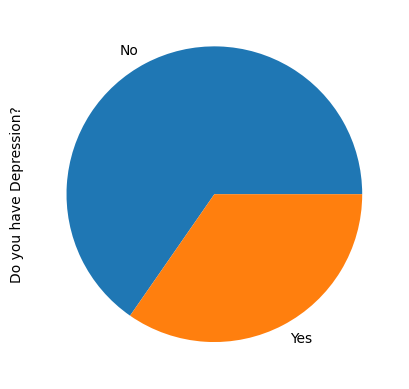

In [ ]:
print(data2['Do you have Depression?'].value_counts())
data2['Do you have Depression?'].value_counts().plot.pie()

<Axes: xlabel='Choose your gender,What is your course?,Do you have Depression?'>

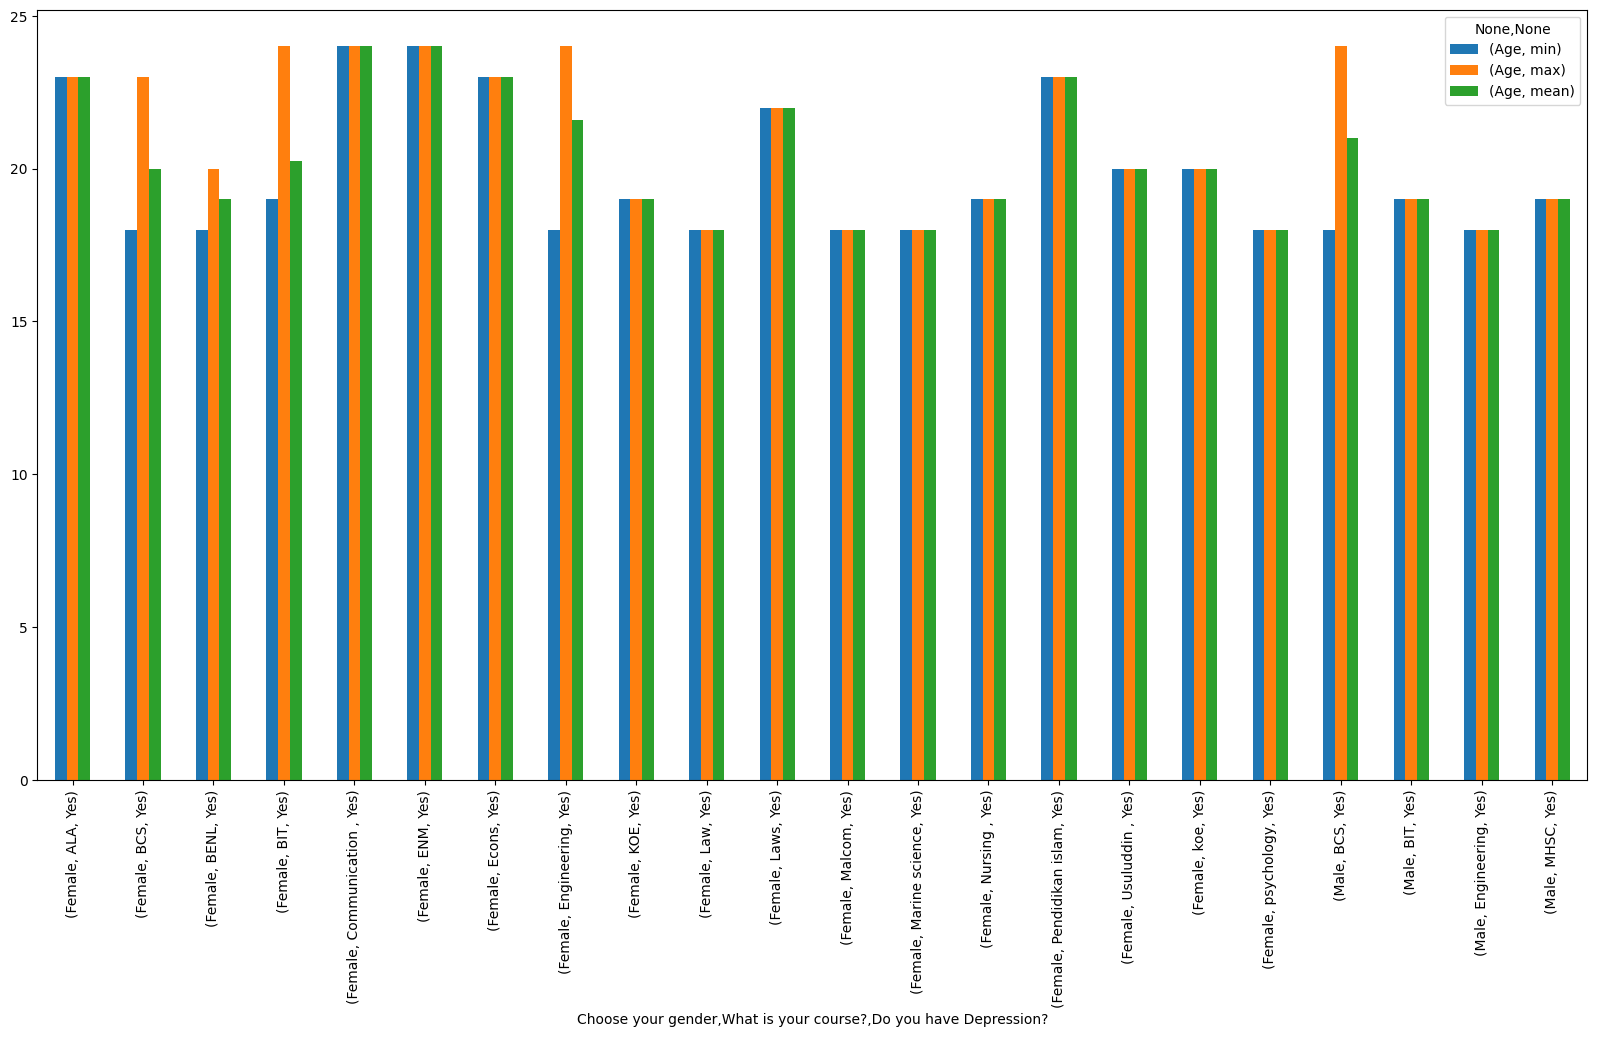

In [ ]:
data2_age_range = data2[group_vars+analyzed_vars][(data2['Do you have Depression?']=='Yes')].groupby(group_vars).agg(['min','max','mean'])
data2_age_range.plot.bar(figsize=(20,10))

## One hot encoding

In [ ]:
data2['Your current year of Study']

0      year 1
1      year 2
2      Year 1
3      year 3
4      year 4
        ...  
96     year 1
97     Year 2
98     Year 3
99     year 4
100    Year 2
Name: Your current year of Study, Length: 101, dtype: object

In [ ]:
data2['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [ ]:
pd.get_dummies(data2['Your current year of Study'])

Year 1  Year 2  Year 3  year 1  year 2  year 3  year 4
0         0       0       0       1       0       0       0
1         0       0       0       0       1       0       0
2         1       0       0       0       0       0       0
3         0       0       0       0       0       1       0
4         0       0       0       0       0       0       1
..      ...     ...     ...     ...     ...     ...     ...
96        0       0       0       1       0       0       0
97        0       1       0       0       0       0       0
98        0       0       1       0       0       0       0
99        0       0       0       0       0       0       1
100       0       1       0       0       0       0       0

[101 rows x 7 columns]

In [ ]:
HTML(
    data2[['Your current year of Study']+analyzed_vars][(data2['Do you have Depression?']=='Yes')].groupby('Your current year of Study').agg(['count','mean']).sort_values(by=('Age','count'),ascending=False).style.background_gradient(cmap='coolwarm', axis=0).to_html()
    )

<Axes: xlabel='Your current year of Study'>

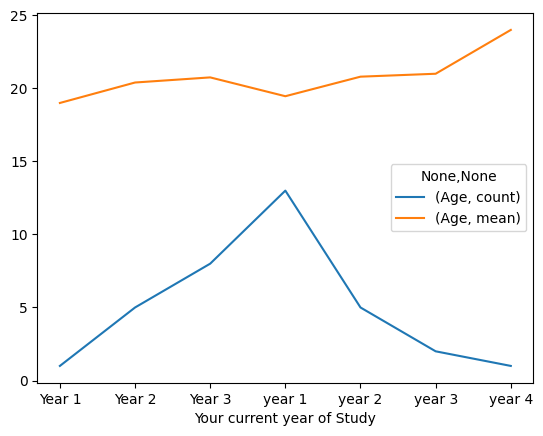

In [ ]:
data2[['Your current year of Study']+analyzed_vars][(data2['Do you have Depression?']=='Yes')].groupby('Your current year of Study').agg(['count','mean']).plot()

In [ ]:
temp = 'KJSDNFLKSDF'
print(temp)
temp2 = temp.lower()
print(temp2)

KJSDNFLKSDF
kjsdnflksdf


In [ ]:
data2['Your current year of Study'] = [x.lower() for x in data2['Your current year of Study']]
pd.get_dummies(data2['Your current year of Study'])

year 1  year 2  year 3  year 4
0         1       0       0       0
1         0       1       0       0
2         1       0       0       0
3         0       0       1       0
4         0       0       0       1
..      ...     ...     ...     ...
96        1       0       0       0
97        0       1       0       0
98        0       0       1       0
99        0       0       0       1
100       0       1       0       0

[101 rows x 4 columns]

In [ ]:
pd.concat([data2,pd.get_dummies(data2['Your current year of Study'])],axis=1, ignore_index=False)

Timestamp Choose your gender   Age What is your course?  \
0   2020-08-07 12:02:00             Female  18.0          Engineering   
1   2020-08-07 12:04:00               Male  21.0    Islamic education   
2   2020-08-07 12:05:00               Male  19.0                  BIT   
3   2020-08-07 12:06:00             Female  22.0                 Laws   
4   2020-08-07 12:13:00               Male  23.0         Mathemathics   
..                  ...                ...   ...                  ...   
96  2020-07-13 19:56:49             Female  21.0                  BCS   
97  2020-07-13 21:21:42               Male  18.0          Engineering   
98  2020-07-13 21:22:56             Female  19.0             Nursing    
99  2020-07-13 21:23:57             Female  23.0     Pendidikan Islam   
100 2020-07-18 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 - 3.49             No   
1                       year 2        3.00 - 3.49             No   
2                       year 1        3.00 - 3.49             No   
3                       year 3        3.00 - 3.49            Yes   
4                       year 4        3.00 - 3.49             No   
..                         ...                ...            ...   
96                      year 1        3.50 - 4.00             No   
97                      year 2        3.00 - 3.49             No   
98                      year 3        3.50 - 4.00            Yes   
99                      year 4        3.50 - 4.00             No   
100                     year 2        3.00 - 3.49             No   

    Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                       Yes                   No                       Yes   
1                        No                  Yes                        No   
2                       Yes                  Yes                       Yes   
3                       Yes                   No                        No   
4                        No                   No                        No   
..                      ...                  ...                       ...   
96                       No                  Yes                        No   
97                      Yes                  Yes                        No   
98                      Yes                   No                       Yes   
99                       No                   No                        No   
100                      No                   No                        No   

    Did you seek any specialist for a treatment?  year 1  year 2  year 3  \
0                                             No       1       0       0   
1                                             No       0       1       0   
2                                             No       1       0       0   
3                                             No       0       0       1   
4                                             No       0       0       0   
..                                           ...     ...     ...     ...   
96                                            No       1       0       0   
97                                            No       0       1       0   
98                                            No       0       0       1   
99                                            No       0       0       0   
100                                           No       0       1       0   

     year 4  
0         0  
1         0  
2         0  
3         0  
4         1  
..      ...  
96        0  
97        0  
98        0  
99        1  
100       0  

[101 rows x 15 columns]

# Entrenamiento para predicción

## Modelos no supervisados

### Set de datos

In [ ]:
# Obtener los datos
data_housing = fetch_california_housing() # https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [ ]:
# crear el data frame de varibles independientes o entrada
df_housing = pd.DataFrame(data= data_housing.get('data'), columns=data_housing.feature_names)
df_housing.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

In [ ]:
# crear el data frame de variable dependeiente  o salida

# The target variable is the median house value for California districts.
df_house_price = pd.DataFrame(data_housing.target, columns= ['price'])*1000 #pasar a miles de dolares
df_house_price.describe()

price
count  20640.000000
mean    2068.558169
std     1153.956159
min      149.990000
25%     1196.000000
50%     1797.000000
75%     2647.250000
max     5000.010000

In [ ]:
# Unir los datos de entrada y salida
data_house = pd.concat([df_housing,df_house_price],axis=1)
print(data_house.sample(5))
columnas = list(data_house.columns)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
11090  5.0605      24.0  5.660714   0.937500       700.0  3.125000     33.82   
8299   5.8408      52.0  5.411765   1.002451       791.0  1.938725     33.77   
19620  3.5000      52.0  5.195876   0.989691       295.0  3.041237     37.42   
10142  7.8980      23.0  6.665217   0.982609       693.0  3.013043     33.90   
18009  3.3370      29.0  4.212074   1.055728      1602.0  2.479876     37.29   

       Longitude   price  
11090    -117.89  2162.0  
8299     -118.14  5000.0  
19620    -121.06   735.0  
10142    -117.89  2582.0  
18009    -121.97  2653.0  


### Exploración de los datos

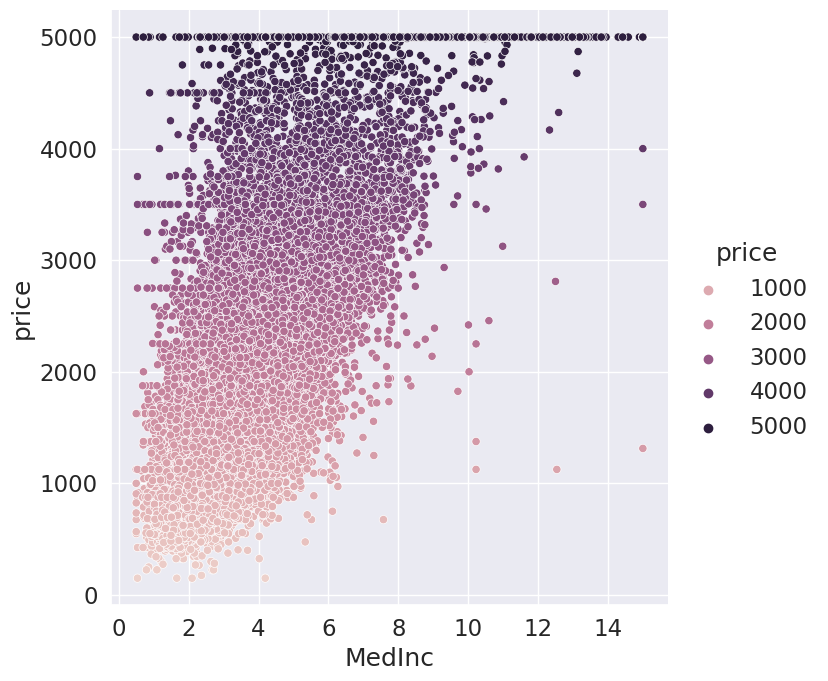

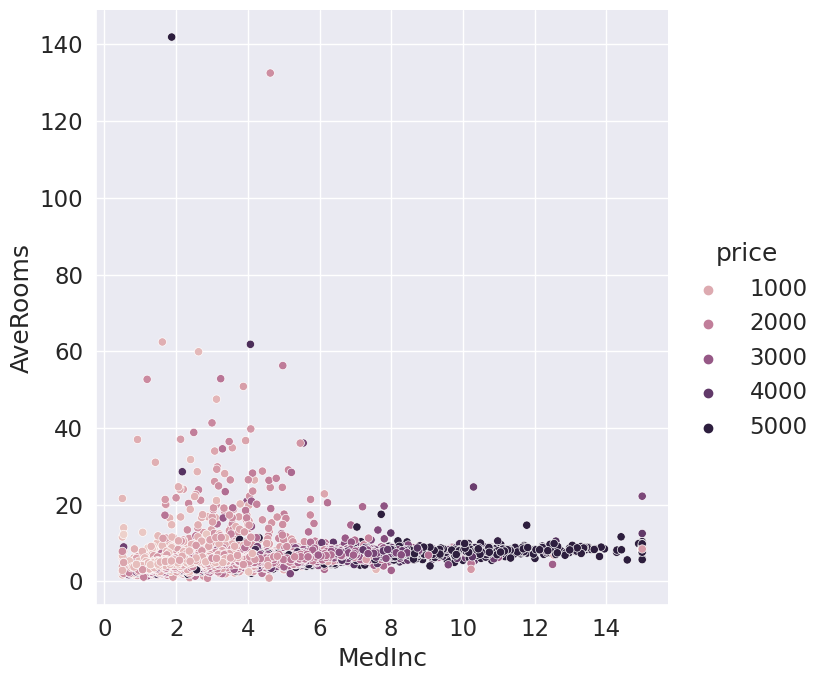

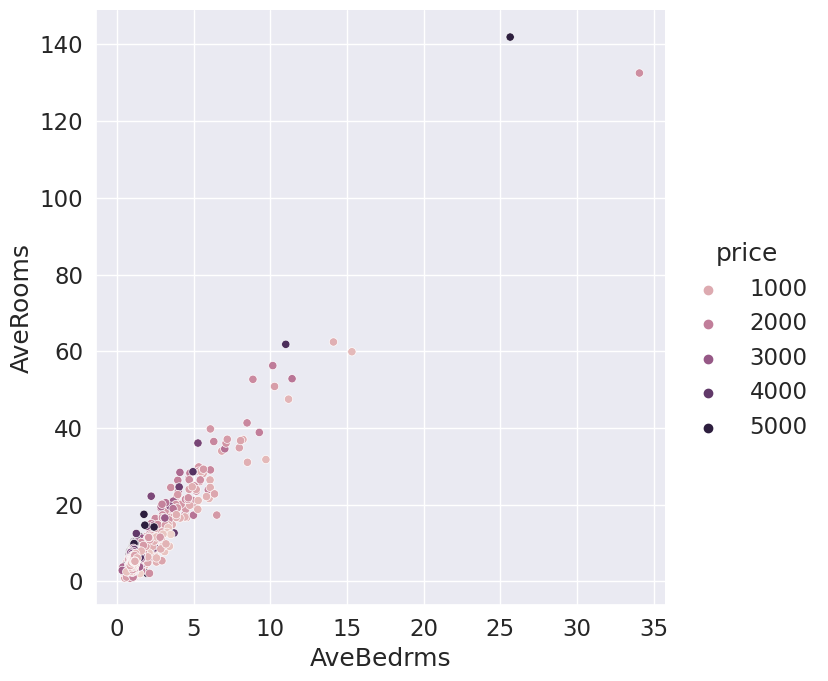

In [ ]:
sns.set(font_scale=1.5)
fig = sns.pairplot(data_house, x_vars=columnas[0], y_vars=columnas[-1], hue = 'price', aspect=1, height= 7)
fig = sns.pairplot(data_house, x_vars=['MedInc'], y_vars=['AveRooms'], hue = 'price', aspect=1, height= 7)
fig = sns.pairplot(data_house, x_vars=['AveBedrms'], y_vars=['AveRooms'], hue = 'price', aspect=1, height= 7)

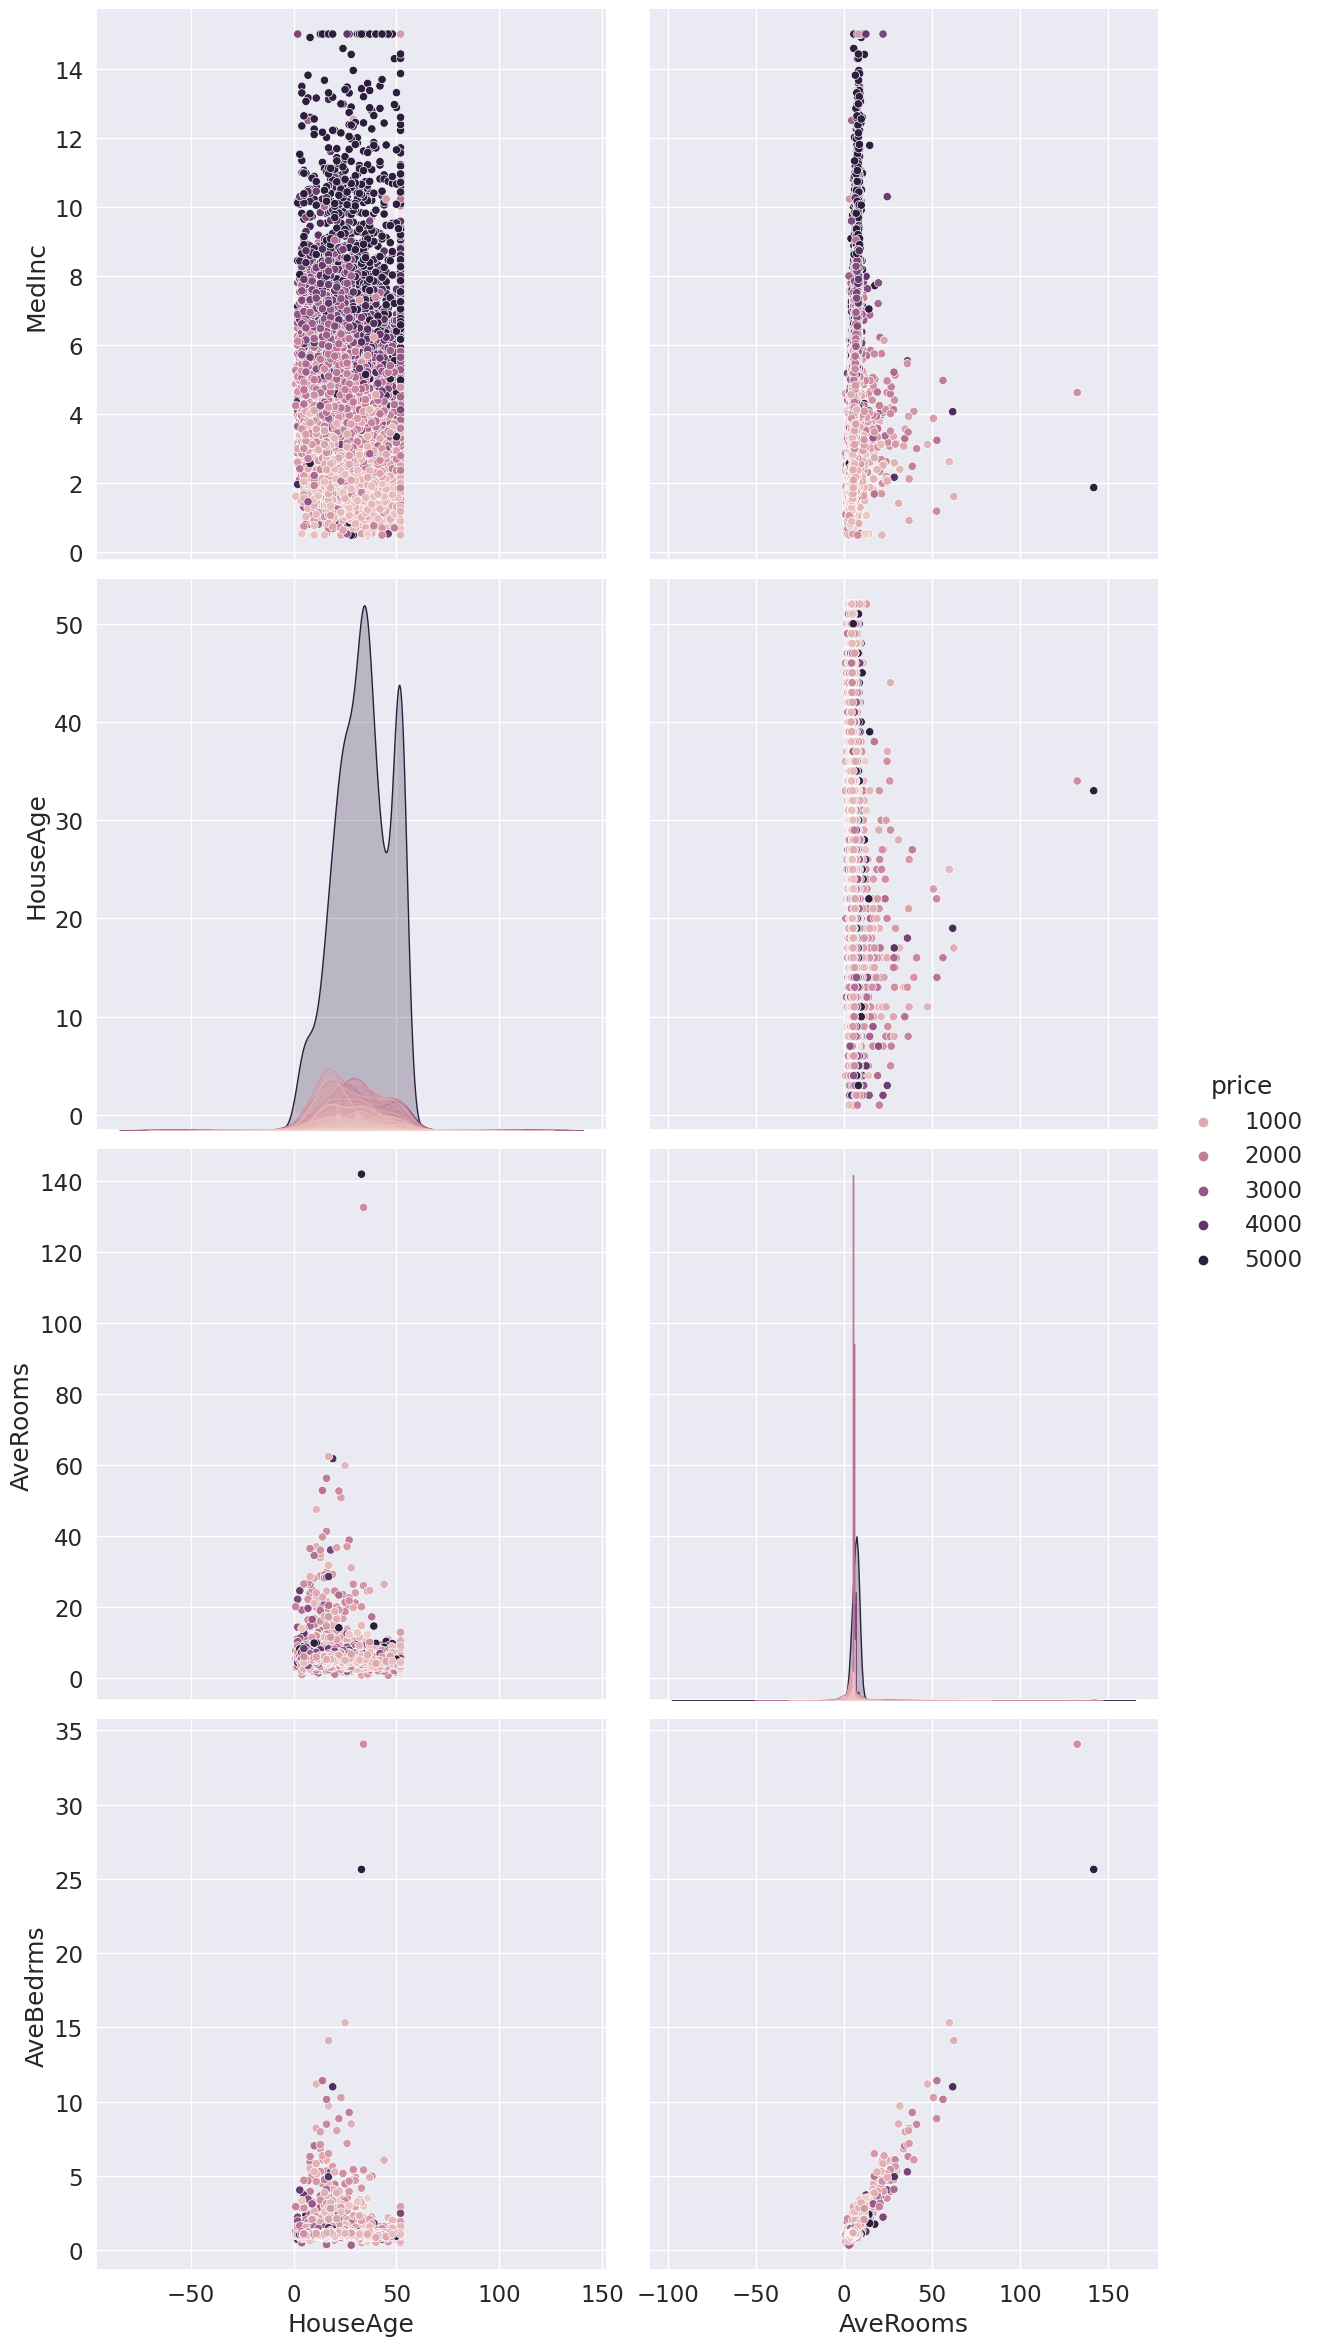

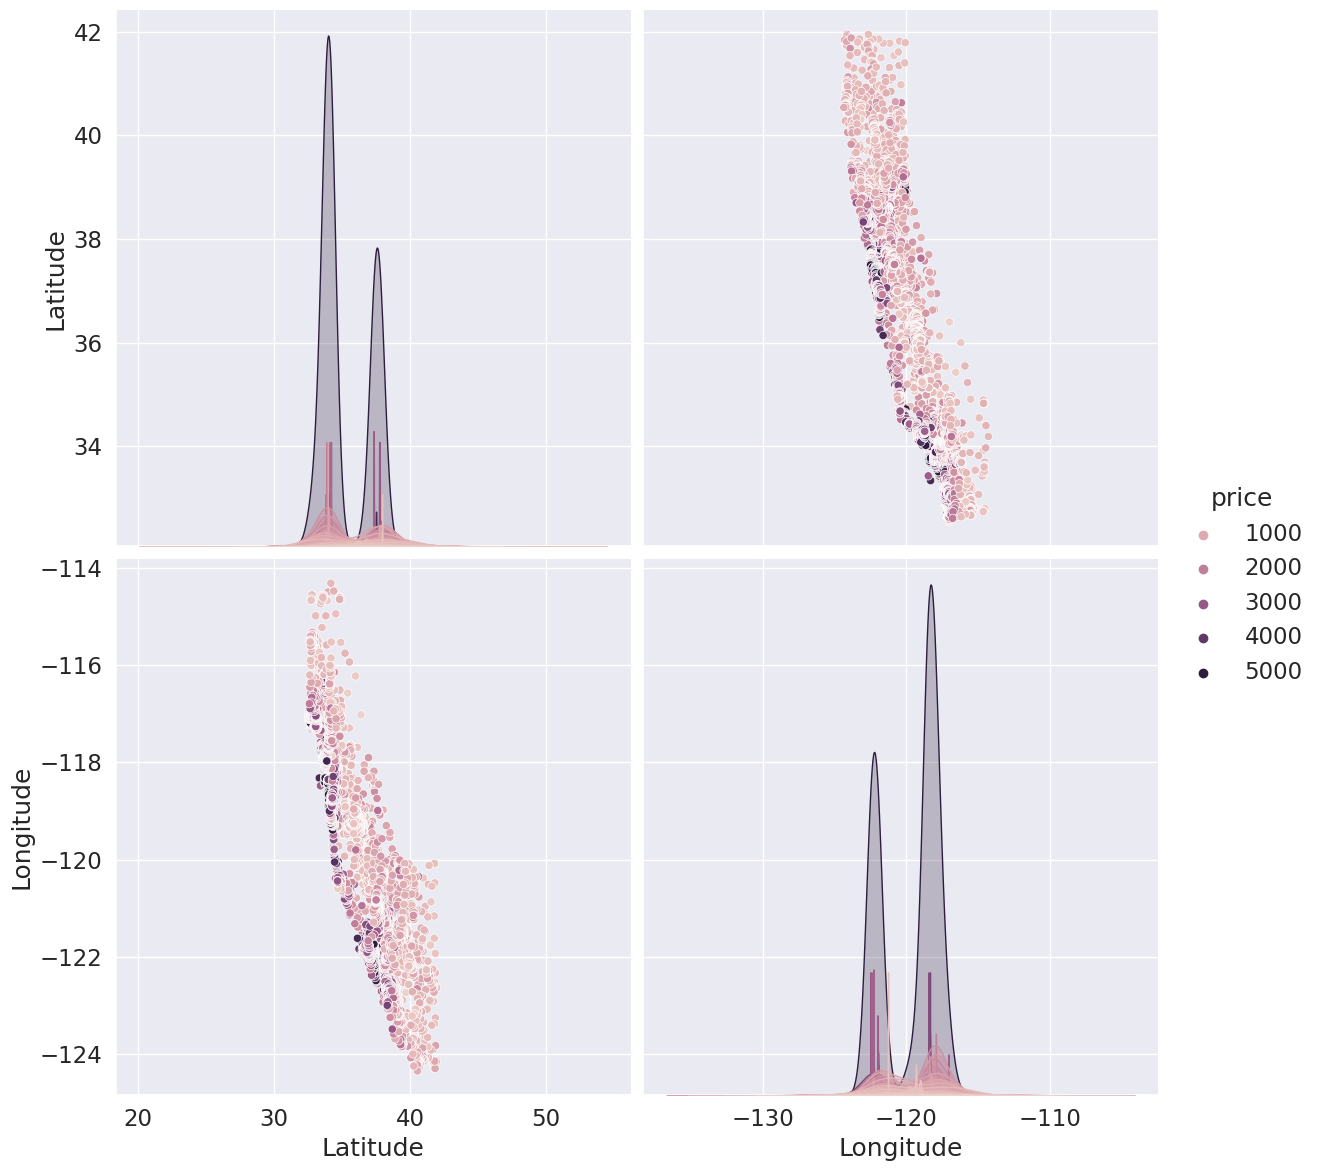

In [ ]:
sns.pairplot(data_house, x_vars=columnas[1:3], y_vars=columnas[0:4], hue = 'price', aspect=1, height= 6)
sns.pairplot(data_house, x_vars=columnas[6:8], y_vars=columnas[6:8], hue = 'price', aspect=1, height= 6)

#### Creación de variables categoricas

In [ ]:
print(data_house[['Latitude','Longitude']].head(3))
data_house['Lat_bins'] = pd.cut(data_house['Latitude'],5)
data_house['Lon_bins'] = pd.cut(data_house['Longitude'],5)
# Agrupamiento por sector y Ingreso Medio
data_house.groupby(['Lat_bins','Lon_bins']).agg(['count','mean','std']).sort_values(('price','mean')).dropna()

   Latitude  Longitude
0     37.88    -122.23
1     37.86    -122.22
2     37.85    -122.24


MedInc                     HouseAge  \
                                       count      mean       std    count   
Lat_bins         Lon_bins                                                   
(40.068, 41.95]  (-120.334, -118.326]      3  2.457667  0.320085        3   
(34.422, 36.304] (-116.318, -114.31]      12  2.181833  0.665677       12   
(32.531, 34.422] (-116.318, -114.31]     203  2.559878  1.243726      203   
(40.068, 41.95]  (-122.342, -120.334]    140  2.624851  0.883712      140   
                 (-124.36, -122.342]     259  2.406690  0.797836      259   
(36.304, 38.186] (-118.326, -116.318]      7  2.188357  0.312337        7   
                 (-120.334, -118.326]    812  2.895236  1.291373      812   
(34.422, 36.304] (-118.326, -116.318]    262  3.397561  1.222114      262   
(38.186, 40.068] (-122.342, -120.334]   1601  3.263133  1.347085     1601   
(34.422, 36.304] (-120.334, -118.326]    666  3.133560  1.615106      666   
(38.186, 40.068] (-120.334, -118.326]    115  3.169431  1.048001      115   
                 (-124.36, -122.342]     514  3.320533  1.197811      514   
(34.422, 36.304] (-122.342, -120.334]    281  3.324431  1.143086      281   
(32.531, 34.422] (-118.326, -116.318]   8191  3.835129  1.813756     8191   
(36.304, 38.186] (-122.342, -120.334]   4215  4.272977  2.055747     4215   
(32.531, 34.422] (-120.334, -118.326]   2389  4.673457  2.260904     2389   
(36.304, 38.186] (-124.36, -122.342]     970  4.313978  1.941400      970   

                                                            AveRooms  \
                                            mean        std    count   
Lat_bins         Lon_bins                                              
(40.068, 41.95]  (-120.334, -118.326]  31.000000   4.358899        3   
(34.422, 36.304] (-116.318, -114.31]   22.833333  14.855873       12   
(32.531, 34.422] (-116.318, -114.31]   21.098522   8.921558      203   
(40.068, 41.95]  (-122.342, -120.334]  22.578571  10.273293      140   
                 (-124.36, -122.342]   26.594595  10.997257      259   
(36.304, 38.186] (-118.326, -116.318]  24.000000   7.527727        7   
                 (-120.334, -118.326]  24.649015  11.752113      812   
(34.422, 36.304] (-118.326, -116.318]  17.309160  11.116926      262   
(38.186, 40.068] (-122.342, -120.334]  24.785759  12.320601     1601   
(34.422, 36.304] (-120.334, -118.326]  25.746246  11.087764      666   
(38.186, 40.068] (-120.334, -118.326]  20.026087   7.297513      115   
                 (-124.36, -122.342]   24.564202  10.952172      514   
(34.422, 36.304] (-122.342, -120.334]  21.163701  10.080829      281   
(32.531, 34.422] (-118.326, -116.318]  28.483457  12.119679     8191   
(36.304, 38.186] (-122.342, -120.334]  29.709134  12.961238     4215   
(32.531, 34.422] (-120.334, -118.326]  31.558811  10.869467     2389   
(36.304, 38.186] (-124.36, -122.342]   41.310309  11.943520      970   

                                                            AveBedrms  ...  \
                                            mean        std     count  ...   
Lat_bins         Lon_bins                                              ...   
(40.068, 41.95]  (-120.334, -118.326]   6.675076   1.133442         3  ...   
(34.422, 36.304] (-116.318, -114.31]    5.726117   1.010199        12  ...   
(32.531, 34.422] (-116.318, -114.31]    5.982476   4.576473       203  ...   
(40.068, 41.95]  (-122.342, -120.334]   6.835192   5.371208       140  ...   
                 (-124.36, -122.342]    5.528152   1.185793       259  ...   
(36.304, 38.186] (-118.326, -116.318]   5.272758   1.020663         7  ...   
                 (-120.334, -118.326]   5.867047   3.435697       812  ...   
(34.422, 36.304] (-118.326, -116.318]   5.798523   0.986521       262  ...   
(38.186, 40.068] (-122.342, -120.334]   5.613602   1.489723      1601  ...   
(34.422, 36.304] (-120.334, -118.326]   5.487839   1.801506       666  ...   
(38.186, 40.068] (-120.334, -118.326]  17.

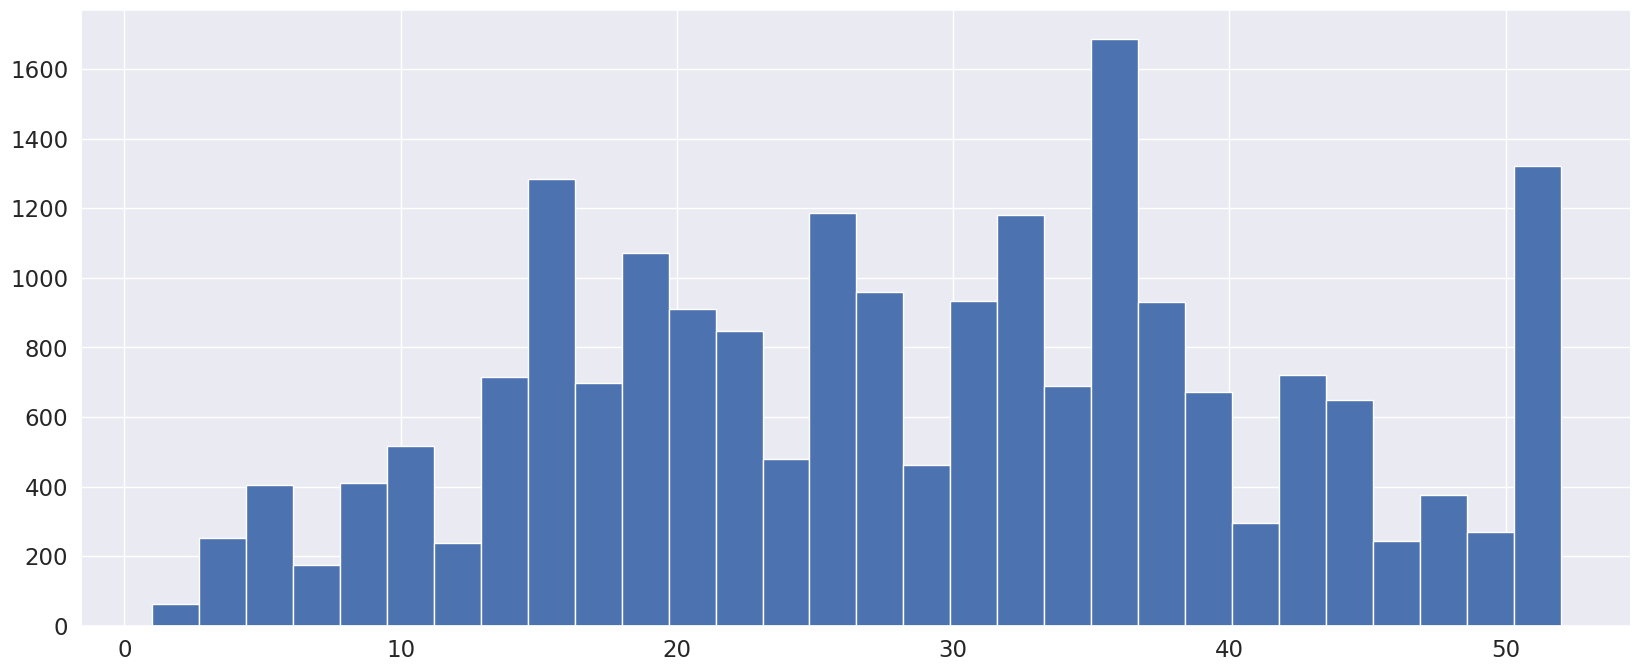

In [ ]:
data_house['HouseAge'].hist(bins=30,figsize=(20,8))

data_house['Age_bins'] = pd.cut(data_house['HouseAge'],[0,12,32,40,100],labels=['Nueva','Usada','Vieja','Muy vieja'])

In [ ]:
data_house.groupby(['Age_bins']).agg(['count','mean','std']).sort_values(('HouseAge','mean')).dropna()

MedInc                     HouseAge                      AveRooms  \
           count      mean       std    count       mean       std    count   
Age_bins                                                                      
Nueva       2061  4.412218  1.941344     2061   7.888404  2.892099     2061   
Usada      10107  3.915128  1.879567    10107  22.472445  5.696815    10107   
Vieja       4594  3.789585  1.786611     4594  35.913148  2.054046     4594   
Muy vieja   3878  3.563053  1.989429     3878  47.124033  4.081936     3878   

                              AveBedrms  ...   AveOccup Latitude             \
               mean       std     count  ...        std    count       mean   
Age_bins                                 ...                                  
Nueva      6.135329  2.730063      2061  ...   2.367740     2061  35.568224   
Usada      5.566685  2.452895     10107  ...   0.993028    10107  35.700506   
Vieja      5.205784  3.026930      4594  ...   8.855257     4594  35.279410   
Muy vieja  4.959200  1.222775      3878  ...  21.809237     3878  35.904304   

                    Longitude                        price               \
                std     count        mean       std  count         mean   
Age_bins                                                                  
Nueva      2.167361      2061 -119.197923  1.987623   2061  1956.509743   
Usada      2.230550     10107 -119.544823  2.021401  10107  2005.828603   
Vieja      1.949596      4594 -119.348441  1.868362   4594  2070.200542   
Muy vieja  2.020743      3878 -120.094252  2.018712   3878  2289.650090   

                        
                   std  
Age_bins                
Nueva      1017.970035  
Usada      1104.396595  
Vieja      1161.928837  
Muy vieja  1301.390860  

[4 rows x 27 columns]

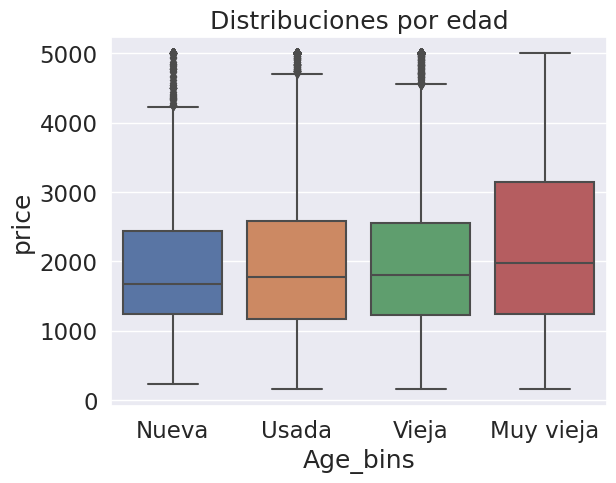

In [ ]:
sns.boxplot(data=data_house,x='Age_bins',y='price',order=['Nueva','Usada','Vieja','Muy vieja']).set(title='Distribuciones por edad')
sns.set(rc={"figure.figsize":(10, 7)})

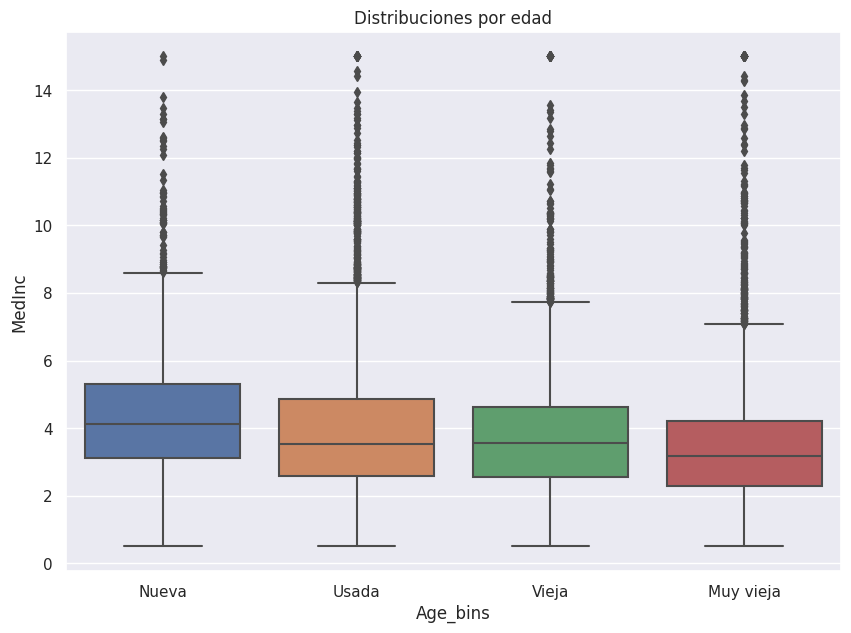

In [ ]:
sns.boxplot(data=data_house,x='Age_bins',y='MedInc',order=['Nueva','Usada','Vieja','Muy vieja']).set(title='Distribuciones por edad')
sns.set(rc={"figure.figsize":(10, 7)})

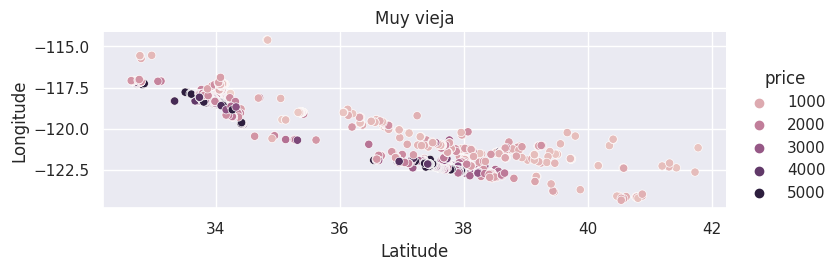

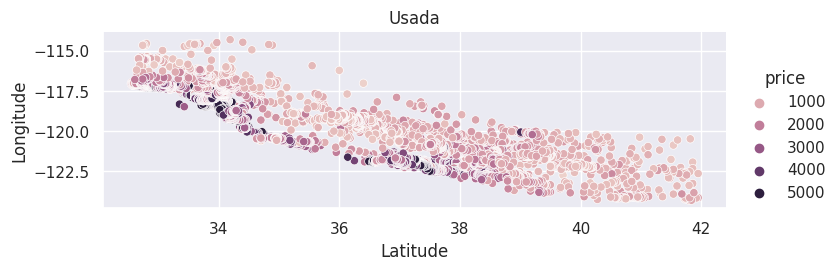

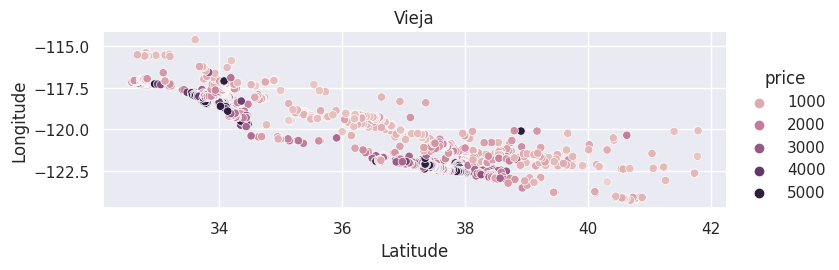

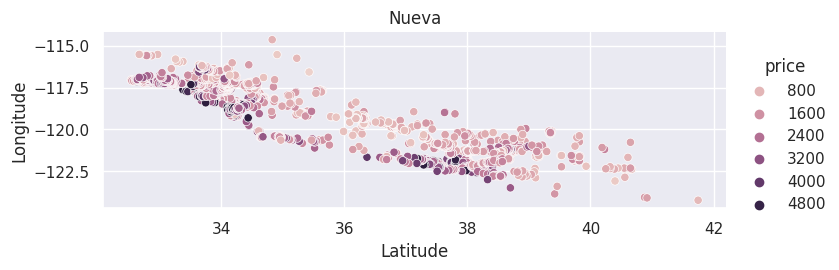

In [ ]:
for tipo in list(data_house['Age_bins'].unique()):
  sns.pairplot(data_house[data_house['Age_bins']==tipo], x_vars=['Latitude'], y_vars=['Longitude'], hue = 'price', aspect=3).set(title=tipo) #MedInc



# Entrenamiento y pruebas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_house, df_house_price, test_size=0.33, random_state=1)

In [ ]:
display(X_train.describe())
display(X_test.describe())

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  13828.000000  13828.000000  13828.000000  13828.000000  13828.000000   
mean       3.875329     28.516344      5.444420      1.098724   1429.413003   
std        1.888719     12.582294      2.608653      0.511179   1134.923110   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.573200     18.000000      4.446466      1.006190    788.000000   
50%        3.540350     29.000000      5.234350      1.048999   1164.000000   
75%        4.743775     37.000000      6.071493      1.099755   1724.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  13828.000000  13828.000000  13828.000000  13828.000000  
mean       3.127801     35.637836   -119.576286   2076.336386  
std       12.657323      2.134814      2.006663   1158.886469  
min        0.750000     32.540000   -124.300000    149.990000  
25%        2.429911     33.930000   -121.810000   1199.000000  
50%        2.817759     34.260000   -118.500000   1800.000000  
75%        3.274911     37.710000   -118.010000   2660.000000  
max     1243.333333     41.950000   -114.310000   5000.010000

MedInc    HouseAge     AveRooms    AveBedrms    Population  \
count  6812.000000  6812.00000  6812.000000  6812.000000   6812.000000   
mean      3.861215    28.88946     5.397698     1.092517   1417.486348   
std       1.922268    12.58940     2.175619     0.387388   1127.490786   
min       0.499900     2.00000     1.130435     0.375000      9.000000   
25%       2.550825    18.00000     4.426335     1.005764    786.000000   
50%       3.524600    29.00000     5.219427     1.048234   1171.000000   
75%       4.742300    37.00000     6.019356     1.099057   1726.000000   
max      15.000100    52.00000    62.422222    14.111111  28566.000000   

          AveOccup     Latitude    Longitude        price  
count  6812.000000  6812.000000  6812.000000  6812.000000  
mean      2.954652    35.619734  -119.556345  2052.768801  
std       1.270791     2.138368     1.997240  1143.804562  
min       0.692308    32.550000  -124.350000   149.990000  
25%       2.429528    33.930000  -121.760000  1193.750000  
50%       2.819478    34.240000  -118.480000  1792.500000  
75%       3.300260    37.720000  -118.010000  2625.000000  
max      63.750000    41.920000  -114.490000  5000.010000

### Caso 1: Precio, Edad e ingresos similares

Cambio de sensibilidad

### Primer escenario

In [ ]:
X_normalized = normalize(X_train[['price','HouseAge','MedInc']],norm='l2')
clustering = AgglomerativeClustering(distance_threshold=0.1, n_clusters= None).fit(X_normalized)
X_train['cluster'] = clustering.labels_
print('Cantidad de cluster: ' + str(X_train['cluster'].nunique()))
# Estadisitcos de los cluster
for cluster in X_train['cluster'].unique():
  display(X_train[X_train['cluster'] == cluster].describe())

Cantidad de cluster: 14


MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  547.000000  547.000000  547.000000  547.000000   547.000000   
mean     2.311189   37.372943    4.792585    1.078725  1182.835466   
std      0.723957    9.014429    0.963969    0.163500   786.042889   
min      0.683100    8.000000    2.093750    0.531250    32.000000   
25%      1.810550   31.000000    4.163871    1.007908   743.000000   
50%      2.197900   37.000000    4.816770    1.056911  1027.000000   
75%      2.725000   44.000000    5.342638    1.112971  1474.500000   
max      5.394600   52.000000   10.400000    2.657921  9879.000000   

         AveOccup    Latitude   Longitude        price  cluster  
count  547.000000  547.000000  547.000000   547.000000    547.0  
mean     3.271589   36.070603 -119.686600   936.111517     10.0  
std      0.969646    2.264300    2.020806   232.007903      0.0  
min      1.312994   32.630000 -124.190000   225.000000     10.0  
25%      2.645106   33.990000 -121.470000   770.500000     10.0  
50%      3.098326   36.150000 -119.320000   938.000000     10.0  
75%      3.735215   37.945000 -118.240000  1116.000000     10.0  
max     11.295918   41.820000 -114.580000  1426.000000     10.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  1206.000000  1206.000000  1206.000000  1206.000000   1206.000000   
mean      5.725072    10.676617     6.538409     1.130633   2070.967662   
std       2.270667     6.427630     2.412969     0.355006   1902.994589   
min       0.536000     1.000000     1.000000     0.500000      3.000000   
25%       4.097375     5.000000     5.386923     1.024129    904.250000   
50%       5.425250     9.000000     6.462976     1.067911   1516.500000   
75%       6.968725    16.000000     7.367627     1.130994   2567.750000   
max      15.000100    26.000000    36.075472     5.944444  16305.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  1206.000000  1206.000000  1206.000000  1206.000000   1206.0  
mean      2.862964    35.189370  -119.284851  3143.445199     12.0  
std       2.434305     1.959318     1.991990  1224.988585      0.0  
min       0.750000    32.560000  -123.490000   550.000000     12.0  
25%       2.353337    33.680000  -121.660000  2042.500000     12.0  
50%       2.806904    34.150000  -118.380000  3107.500000     12.0  
75%       3.171414    37.370000  -117.670000  4163.000000     12.0  
max      83.171429    39.710000  -115.580000  5000.010000     12.0

MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean      2.848689    34.883265     4.916739     1.096865  1225.802449   
std       0.887022     9.773259     1.739132     0.389598   749.567953   
min       0.499900    11.000000     0.846154     0.500000    20.000000   
25%       2.200000    28.000000     4.180812     1.001818   730.000000   
50%       2.790700    36.000000     4.809009     1.046809  1077.000000   
75%       3.432300    42.000000     5.443723     1.101351  1564.000000   
max      10.026300    52.000000    31.777778     9.703704  5466.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  1225.000000  1225.000000  1225.000000  1225.000000   1225.0  
mean      3.183563    35.596898  -119.382359  1321.302041      1.0  
std       1.162721     2.226742     1.960346   375.735490      0.0  
min       1.060606    32.580000  -124.210000   446.000000      1.0  
25%       2.533333    33.960000  -121.420000  1026.000000      1.0  
50%       3.008021    34.150000  -118.310000  1360.000000      1.0  
75%       3.660354    37.770000  -118.100000  1603.000000      1.0  
max      21.333333    41.750000  -114.470000  2213.000000      1.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  1986.000000  1986.000000  1986.000000  1986.000000   1986.000000   
mean      3.639814    31.639980     5.204670     1.087785   1362.393756   
std       1.165980    10.732272     2.023697     0.410460    934.260579   
min       0.677500     8.000000     1.748287     0.545455     23.000000   
25%       2.776625    24.000000     4.350853     1.003422    790.750000   
50%       3.584900    32.000000     5.123742     1.043582   1156.500000   
75%       4.417450    37.000000     5.749227     1.090292   1658.000000   
max       8.078400    52.000000    47.515152    11.181818  11272.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  1986.000000  1986.000000  1986.000000  1986.000000   1986.0  
mean      3.120383    35.507956  -119.580780  2081.863545      3.0  
std      11.251650     2.094733     2.016812   737.619937      0.0  
min       1.239617    32.550000  -124.300000   525.000000      3.0  
25%       2.404990    33.900000  -121.920000  1542.250000      3.0  
50%       2.739865    34.190000  -118.400000  2031.000000      3.0  
75%       3.149400    37.700000  -118.022500  2499.000000      3.0  
max     502.461538    41.950000  -115.370000  4000.000000      3.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  2073.000000  2073.000000  2073.000000  2073.000000   2073.000000   
mean      5.250809    20.715388     6.055703     1.098627   1617.752533   
std       2.147754     8.802040     3.787927     0.657257   1239.020671   
min       0.499900     4.000000     1.678571     0.730769      8.000000   
25%       3.708300    14.000000     4.888483     1.008299    856.000000   
50%       4.974400    19.000000     5.940187     1.045833   1305.000000   
75%       6.424600    27.000000     6.814136     1.094340   1980.000000   
max      15.000100    43.000000   141.909091    25.636364  12153.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  2073.000000  2073.000000  2073.000000  2073.000000   2073.0  
mean      2.733968    35.440632  -119.621823  3044.192904      7.0  
std       0.710152     1.976643     1.978569  1192.246523      0.0  
min       1.066176    32.550000  -123.850000   692.000000      7.0  
25%       2.332962    33.860000  -121.890000  2132.000000      7.0  
50%       2.720792    34.220000  -118.520000  2806.000000      7.0  
75%       3.076037    37.400000  -117.950000  3944.000000      7.0  
max      13.212987    40.600000  -115.750000  5000.010000      7.0

MedInc    HouseAge    AveRooms   AveBedrms  Population    AveOccup  \
count  132.000000  132.000000  132.000000  132.000000   132.00000  132.000000   
mean     1.845104   42.143939    4.695152    1.117249   985.05303    3.228777   
std      0.722858    7.013762    1.028252    0.287654   651.99374    1.143029   
min      0.499900   23.000000    1.714286    0.571429    18.00000    1.704797   
25%      1.464525   38.000000    4.270112    1.005564   543.25000    2.552860   
50%      1.721250   42.000000    4.604817    1.070218   917.50000    3.085622   
75%      2.014950   48.000000    5.016489    1.128922  1365.75000    3.614291   
max      7.575200   52.000000    9.161111    3.411111  4749.00000   11.634146   

         Latitude   Longitude       price  cluster  
count  132.000000  132.000000  132.000000    132.0  
mean    36.911818 -119.988561  584.189394     11.0  
std      1.877238    1.700547   96.552492      0.0  
min     32.790000 -124.160000  300.000000     11.0  
25%     35.380000 -121.280000  513.750000     11.0  
50%     36.750000 -119.790000  586.000000     11.0  
75%     37.972500 -119.010000  660.250000     11.0  
max     41.730000 -115.510000  779.000000     11.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  3037.000000  3037.000000  3037.000000  3037.000000   3037.000000   
mean      4.352894    26.326638     5.601485     1.090963   1502.681923   
std       1.796142    11.594374     2.073856     0.367010   1218.106594   
min       0.536000     4.000000     1.598131     0.333333      5.000000   
25%       3.162800    17.000000     4.603774     1.004920    821.000000   
50%       4.137200    24.000000     5.494262     1.042601   1238.000000   
75%       5.228500    34.000000     6.237219     1.088889   1844.000000   
max      15.000100    52.000000    41.333333     8.476190  35682.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  3037.000000  3037.000000  3037.000000  3037.000000   3037.0  
mean      2.777442    35.574656  -119.637178  2479.191225      0.0  
std       1.041118     2.073243     2.010691  1101.769793      0.0  
min       1.215873    32.540000  -124.170000   425.000000      0.0  
25%       2.347439    33.910000  -121.920000  1620.000000      0.0  
50%       2.713299    34.260000  -118.520000  2277.000000      0.0  
75%       3.079225    37.690000  -117.990000  3115.000000      0.0  
max      41.214286    41.380000  -114.620000  5000.010000      0.0

MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  2049.000000  2049.000000  2049.000000  2049.000000  2049.000000   
mean      3.285181    33.262079     5.150517     1.107908  1281.008297   
std       1.025019    10.278311     3.361856     0.808806   802.064759   
min       0.499900     9.000000     1.654440     0.562500    14.000000   
25%       2.562500    26.000000     4.305714     0.997059   775.000000   
50%       3.240000    34.000000     5.026578     1.042895  1112.000000   
75%       4.019700    39.000000     5.609195     1.093750  1571.000000   
max       9.706600    52.000000   132.533333    34.066667  7443.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  2049.000000  2049.000000  2049.000000  2049.000000   2049.0  
mean      3.222398    35.549985  -119.468184  1642.481210      2.0  
std       5.143529     2.158085     2.010614   513.799419      0.0  
min       1.308244    32.570000  -124.190000   450.000000      2.0  
25%       2.513548    33.940000  -121.620000  1292.000000      2.0  
50%       2.941399    34.180000  -118.340000  1639.000000      2.0  
75%       3.510086    37.710000  -118.030000  1938.000000      2.0  
max     230.172414    41.780000  -114.310000  3000.000000      2.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  262.000000  262.000000  262.000000  262.000000   262.000000   
mean     1.994835   39.072519    4.761105    1.091384  1028.790076   
std      0.667494    7.315449    0.992239    0.187958   713.567159   
min      0.863900   17.000000    1.806122    0.444444    29.000000   
25%      1.524025   34.000000    4.284154    1.010937   611.750000   
50%      1.913700   38.000000    4.704108    1.061072   911.500000   
75%      2.328375   44.000000    5.167197    1.127791  1306.250000   
max      6.118300   52.000000   12.320000    2.993333  6846.000000   

         AveOccup    Latitude   Longitude       price  cluster  
count  262.000000  262.000000  262.000000  262.000000    262.0  
mean     3.189885   36.794351 -119.942824  652.328244      5.0  
std      0.891302    2.022031    1.961622  124.443155      0.0  
min      1.169329   32.700000 -124.210000  275.000000      5.0  
25%      2.600012   35.350000 -121.457500  565.000000      5.0  
50%      3.081980   36.770000 -119.815000  641.000000      5.0  
75%      3.614799   37.987500 -119.002500  734.000000      5.0  
max      8.222222   41.790000 -114.570000  950.000000      5.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  709.000000  709.000000  709.000000  709.000000   709.000000   
mean     2.574377   34.877292    4.950193    1.101752  1183.330042   
std      0.810798    9.556871    2.286720    0.555941   707.704464   
min      0.705400   12.000000    1.680774    0.695652    13.000000   
25%      2.017400   28.000000    4.212687    1.008434   761.000000   
50%      2.510400   35.000000    4.896373    1.060890  1072.000000   
75%      3.141500   42.000000    5.496633    1.114108  1459.000000   
max     10.226400   52.000000   59.875000   15.312500  7460.000000   

          AveOccup    Latitude   Longitude        price  cluster  
count   709.000000  709.000000  709.000000   709.000000    709.0  
mean      4.927848   36.088406 -119.702468  1051.313117      9.0  
std      46.583262    2.282552    2.075518   291.023978      0.0  
min       1.280603   32.640000 -124.220000   400.000000      9.0  
25%       2.526151   34.000000 -121.620000   847.000000      9.0  
50%       3.008850   36.070000 -119.300000  1030.000000      9.0  
75%       3.762646   37.960000 -118.190000  1268.000000      9.0  
max    1243.333333   41.950000 -114.570000  1711.000000      9.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  521.000000  521.000000  521.000000  521.000000   521.000000   
mean     2.181000   38.788868    4.871336    1.086322  1056.284069   
std      0.682583    8.051609    1.303785    0.265363   567.594638   
min      0.536000   18.000000    1.260870    0.742574    29.000000   
25%      1.712500   33.000000    4.327434    1.008850   707.000000   
50%      2.147700   38.000000    4.841463    1.058989   971.000000   
75%      2.589800   45.000000    5.324042    1.110795  1276.000000   
max      5.517900   52.000000   26.452174    6.060870  4198.000000   

         AveOccup    Latitude   Longitude        price  cluster  
count  521.000000  521.000000  521.000000   521.000000    521.0  
mean     4.203895   36.532246 -119.919520   801.510557      6.0  
std     26.149045    2.279388    2.018312   175.778511      0.0  
min      1.286245   32.670000 -124.230000   392.000000      6.0  
25%      2.566108   34.070000 -121.540000   668.000000      6.0  
50%      2.978261   36.780000 -119.810000   796.000000      6.0  
75%      3.545455   38.100000 -118.270000   938.000000      6.0  
max    599.714286   41.530000 -114.610000  1190.000000      6.0

MedInc   HouseAge   AveRooms  AveBedrms   Population   AveOccup  \
count  67.000000  67.000000  67.000000  67.000000    67.000000  67.000000   
mean    1.649272  45.208955   4.778546   1.152162   979.582090   3.179554   
std     0.515288   5.563783   1.034526   0.251668   463.086423   0.757067   
min     0.802400  31.000000   2.608931   0.890566     8.000000   1.606557   
25%     1.274100  41.000000   4.183779   1.054043   637.000000   2.630093   
50%     1.650900  46.000000   4.700000   1.102881   902.000000   3.173684   
75%     1.917950  50.000000   5.332937   1.186340  1225.000000   3.612741   
max     3.534500  52.000000   9.144208   2.971631  2219.000000   5.455357   

        Latitude   Longitude       price  cluster  
count  67.000000   67.000000   67.000000     67.0  
mean   37.523881 -120.181194  510.074627      8.0  
std     2.122550    2.040063   65.730928      0.0  
min    32.660000 -124.170000  367.000000      8.0  
25%    36.425000 -121.505000  452.500000      8.0  
50%    36.750000 -119.800000  525.000000      8.0  
75%    39.145000 -119.675000  559.500000      8.0  
max    41.780000 -114.590000  629.000000      8.0

MedInc   HouseAge   AveRooms  AveBedrms   Population   AveOccup  \
count  10.000000  10.000000  10.000000  10.000000    10.000000  10.000000   
mean    1.775350  44.900000   4.889439   1.239471  1451.100000   3.662459   
std     0.529466  11.189777   1.045159   0.195152  2000.289226   0.974004   
min     0.696000  19.000000   3.578947   1.009346   248.000000   2.400534   
25%     1.496875  40.500000   4.249566   1.061747   386.500000   2.808176   
50%     1.846400  52.000000   4.948980   1.229232   649.000000   3.622697   
75%     2.162475  52.000000   5.270013   1.363023  1668.500000   4.335794   
max     2.383200  52.000000   7.275862   1.592593  6852.000000   5.037037   

        Latitude   Longitude       price  cluster  
count  10.000000   10.000000   10.000000     10.0  
mean   36.386000 -119.421000  383.599000     13.0  
std     2.119519    1.843399  104.957702      0.0  
min    32.670000 -122.370000  149.990000     13.0  
25%    35.190000 -120.727500  357.250000     13.0  
50%    36.565000 -119.615000  425.000000     13.0  
75%    37.632500 -117.770000  436.750000     13.0  
max    40.350000 -117.020000  495.000000     13.0

MedInc   HouseAge  AveRooms  AveBedrms   Population  AveOccup  \
count  4.000000   4.000000  4.000000   4.000000     4.000000  4.000000   
mean   2.272275  42.500000  4.155087   1.151847   738.250000  2.754861   
std    0.343372   8.266398  1.323878   0.049006   597.672918  0.649071   
min    1.851900  33.000000  2.654450   1.104712   216.000000  1.876812   
25%    2.109600  37.500000  3.342960   1.121095   248.250000  2.540538   
50%    2.281100  42.500000  4.135438   1.142643   657.000000  2.857031   
75%    2.443775  47.500000  4.947565   1.173395  1147.000000  3.071354   
max    2.675000  52.000000  5.695021   1.217391  1423.000000  3.428571   

        Latitude   Longitude       price  cluster  
count   4.000000    4.000000    4.000000      4.0  
mean   36.247500 -120.630000  248.500000      4.0  
std     1.899796    2.056161   63.840948      0.0  
min    34.150000 -122.410000  175.000000      4.0  
25%    34.885000 -122.342500  212.500000      4.0  
50%    36.455000 -120.890000  247.000000      4.0  
75%    37.817500 -119.177500  283.000000      4.0  
max    37.930000 -118.330000  325.000000      4.0

### Segundo escenario


In [ ]:
X_normalized = normalize(X_train[['price','HouseAge','MedInc']], norm='l2')
clustering = AgglomerativeClustering(distance_threshold=0.30, n_clusters= None).fit(X_normalized)
X_train['cluster'] = clustering.labels_
print('Cantidad de cluster: ' + str(X_train['cluster'].nunique()))
# Estadisitcos de los cluster
for cluster in X_train['cluster'].unique():
  display(X_train[X_train['cluster'] == cluster].describe())

Cantidad de cluster: 7


MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  1256.000000  1256.000000  1256.000000  1256.000000  1256.000000   
mean      2.459756    35.964172     4.881553     1.091724  1183.114650   
std       0.784810     9.402695     1.833123     0.431417   742.533724   
min       0.683100     8.000000     1.680774     0.531250    13.000000   
25%       1.907625    29.000000     4.191755     1.008160   746.750000   
50%       2.359400    36.000000     4.842962     1.059322  1054.500000   
75%       2.976775    43.000000     5.437518     1.113848  1463.250000   
max      10.226400    52.000000    59.875000    15.312500  9879.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  1256.000000  1256.000000  1256.000000  1256.000000   1256.0  
mean      4.206531    36.080653  -119.695557  1001.141720      3.0  
std      35.003934     2.273734     2.051073   272.880212      0.0  
min       1.280603    32.630000  -124.220000   225.000000      3.0  
25%       2.582401    33.990000  -121.500000   813.750000      3.0  
50%       3.064038    36.085000  -119.310000   982.000000      3.0  
75%       3.750405    37.952500  -118.210000  1185.000000      3.0  
max    1243.333333    41.950000  -114.570000  1711.000000      3.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  3279.000000  3279.000000  3279.000000  3279.000000   3279.000000   
mean      5.425240    17.023178     6.233240     1.110398   1784.442818   
std       2.205311     9.359445     3.356194     0.565352   1532.767767   
min       0.499900     1.000000     1.000000     0.500000      3.000000   
25%       3.821900    10.000000     5.042997     1.013524    871.500000   
50%       5.145700    16.000000     6.139896     1.053726   1371.000000   
75%       6.608650    23.000000     7.058500     1.106279   2164.500000   
max      15.000100    43.000000   141.909091    25.636364  16305.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  3279.000000  3279.000000  3279.000000  3279.000000   3279.0  
mean      2.781412    35.348219  -119.497887  3080.697408      5.0  
std       1.581454     1.973713     1.989859  1205.156996      0.0  
min       0.750000    32.550000  -123.850000   550.000000      5.0  
25%       2.338078    33.800000  -121.845000  2109.500000      5.0  
50%       2.747078    34.190000  -118.480000  2898.000000      5.0  
75%       3.107446    37.400000  -117.830000  4025.500000      5.0  
max      83.171429    40.600000  -115.580000  5000.010000      5.0

MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  3274.000000  3274.000000  3274.000000  3274.000000  3274.000000   
mean      3.121863    33.868662     5.063046     1.103776  1260.352474   
std       0.998147    10.121256     2.866339     0.682730   783.175133   
min       0.499900     9.000000     0.846154     0.500000    14.000000   
25%       2.405250    27.000000     4.246876     1.000000   758.250000   
50%       3.088750    35.000000     4.938074     1.044376  1097.000000   
75%       3.796900    41.000000     5.546440     1.097549  1567.000000   
max      10.026300    52.000000   132.533333    34.066667  7443.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  3274.000000  3274.000000  3274.000000  3274.000000   3274.0  
mean      3.207867    35.567538  -119.436072  1522.308797      0.0  
std       4.130382     2.183806     1.992087   492.081209      0.0  
min       1.060606    32.570000  -124.210000   446.000000      0.0  
25%       2.517567    33.950000  -121.480000  1149.250000      0.0  
50%       2.953662    34.170000  -118.330000  1538.000000      0.0  
75%       3.571601    37.720000  -118.050000  1821.000000      0.0  
max     230.172414    41.780000  -114.310000  3000.000000      0.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  5023.000000  5023.000000  5023.000000  5023.000000   5023.000000   
mean      4.070956    28.427434     5.444591     1.089707   1447.214613   
std       1.615321    11.556170     2.063113     0.384739   1116.563003   
min       0.536000     4.000000     1.598131     0.333333      5.000000   
25%       3.018000    19.000000     4.501805     1.004246    809.000000   
50%       3.898400    27.000000     5.329457     1.042813   1200.000000   
75%       4.905250    36.000000     6.057114     1.089820   1764.500000   
max      15.000100    52.000000    47.515152    11.181818  35682.000000   

          AveOccup     Latitude    Longitude        price  cluster  
count  5023.000000  5023.000000  5023.000000  5023.000000   5023.0  
mean      2.913035    35.548284  -119.614880  2322.095312      2.0  
std       7.122028     2.081814     2.013102   993.302999      0.0  
min       1.215873    32.540000  -124.300000   425.000000      2.0  
25%       2.375208    33.900000  -121.920000  1597.000000      2.0  
50%       2.722365    34.220000  -118.470000  2158.000000      2.0  
75%       3.100487    37.690000  -118.010000  2829.500000      2.0  
max     502.461538    41.950000  -114.620000  5000.010000      2.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  394.000000  394.000000  394.000000  394.000000   394.000000   
mean     1.944671   40.101523    4.739009    1.100049  1014.137056   
std      0.689261    7.351574    1.003623    0.226259   693.024031   
min      0.499900   17.000000    1.714286    0.444444    18.000000   
25%      1.495350   35.000000    4.274675    1.009835   580.250000   
50%      1.829000   40.000000    4.674339    1.065320   911.500000   
75%      2.233000   45.000000    5.112137    1.128006  1324.250000   
max      7.575200   52.000000   12.320000    3.411111  6846.000000   

         AveOccup    Latitude   Longitude       price  cluster  
count  394.000000  394.000000  394.000000  394.000000    394.0  
mean     3.202915   36.833706 -119.958147  629.500000      4.0  
std      0.981547    1.973092    1.876149  120.121254      0.0  
min      1.169329   32.700000 -124.210000  275.000000      4.0  
25%      2.576642   35.370000 -121.440000  547.750000      4.0  
50%      3.081980   36.760000 -119.800000  621.500000      4.0  
75%      3.614799   37.980000 -119.010000  700.000000      4.0  
max     11.634146   41.790000 -114.570000  950.000000      4.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  521.000000  521.000000  521.000000  521.000000   521.000000   
mean     2.181000   38.788868    4.871336    1.086322  1056.284069   
std      0.682583    8.051609    1.303785    0.265363   567.594638   
min      0.536000   18.000000    1.260870    0.742574    29.000000   
25%      1.712500   33.000000    4.327434    1.008850   707.000000   
50%      2.147700   38.000000    4.841463    1.058989   971.000000   
75%      2.589800   45.000000    5.324042    1.110795  1276.000000   
max      5.517900   52.000000   26.452174    6.060870  4198.000000   

         AveOccup    Latitude   Longitude        price  cluster  
count  521.000000  521.000000  521.000000   521.000000    521.0  
mean     4.203895   36.532246 -119.919520   801.510557      6.0  
std     26.149045    2.279388    2.018312   175.778511      0.0  
min      1.286245   32.670000 -124.230000   392.000000      6.0  
25%      2.566108   34.070000 -121.540000   668.000000      6.0  
50%      2.978261   36.780000 -119.810000   796.000000      6.0  
75%      3.545455   38.100000 -118.270000   938.000000      6.0  
max    599.714286   41.530000 -114.610000  1190.000000      6.0

MedInc   HouseAge   AveRooms  AveBedrms   Population   AveOccup  \
count  81.000000  81.000000  81.000000  81.000000    81.000000  81.000000   
mean    1.695602  45.037037   4.761448   1.162925  1025.876543   3.218200   
std     0.523674   6.521971   1.045104   0.239714   817.911569   0.795003   
min     0.696000  19.000000   2.608931   0.890566     8.000000   1.606557   
25%     1.304700  41.000000   4.140940   1.055249   603.000000   2.652803   
50%     1.708300  46.000000   4.700000   1.107050   890.000000   3.173684   
75%     2.053600  52.000000   5.332542   1.217391  1280.000000   3.641509   
max     3.534500  52.000000   9.144208   2.971631  6852.000000   5.455357   

        Latitude   Longitude       price  cluster  
count  81.000000   81.000000   81.000000     81.0  
mean   37.320370 -120.109506  481.543086      1.0  
std     2.135161    2.012826   97.739240      0.0  
min    32.660000 -124.170000  149.990000      1.0  
25%    36.210000 -121.460000  435.000000      1.0  
50%    36.750000 -119.800000  495.000000      1.0  
75%    38.540000 -119.450000  550.000000      1.0  
max    41.780000 -114.590000  629.000000      1.0

### Tercer escenario

In [ ]:
pd.get_dummies(data_house['Age_bins'] )

Nueva  Usada  Vieja  Muy vieja
0          0      0      0          1
1          0      1      0          0
2          0      0      0          1
3          0      0      0          1
4          0      0      0          1
...      ...    ...    ...        ...
20635      0      1      0          0
20636      0      1      0          0
20637      0      1      0          0
20638      0      1      0          0
20639      0      1      0          0

[20640 rows x 4 columns]

In [ ]:

data_house = pd.concat([data_house,pd.get_dummies(data_house['Age_bins'] )],axis=1, ignore_index=False)
print(data_house.sample(3))

X_train, X_test, y_train, y_test = train_test_split(data_house, df_house_price, test_size=0.33, random_state=1)

X_normalized = normalize(X_train[['price','HouseAge','MedInc','Nueva',  'Usada',  'Vieja',  'Muy vieja']], norm='l2')
clustering = AgglomerativeClustering(distance_threshold=0.1, n_clusters= None, linkage='ward').fit(X_normalized) #average
X_train['cluster'] = clustering.labels_
print('Cantidad de cluster: ' + str(X_train['cluster'].nunique()))
# Estadisitcos de los cluster
for cluster in X_train['cluster'].unique():
  display(X_train[X_train['cluster'] == cluster].describe())

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14671  5.5673       7.0  5.865385   1.139423      2710.0  2.605769     32.81   
14743  3.5125      11.0  4.277860   1.008915      2098.0  3.117385     32.58   
4655   2.5284      44.0  3.896040   0.965347      1323.0  3.274752     34.05   

       Longitude   price          Lat_bins              Lon_bins   Age_bins  \
14671    -117.09  2882.0  (32.531, 34.422]  (-118.326, -116.318]      Nueva   
14743    -117.06  1424.0  (32.531, 34.422]  (-118.326, -116.318]      Nueva   
4655     -118.33  2263.0  (32.531, 34.422]  (-120.334, -118.326]  Muy vieja   

       Nueva  Usada  Vieja  Muy vieja  
14671      1      0      0          0  
14743      1      0      0          0  
4655       0      0      0          1  
Cantidad de cluster: 15


MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  815.000000  815.000000  815.000000  815.000000   815.000000   
mean     2.440349   36.678528    4.886002    1.093575  1150.903067   
std      0.754624    8.948513    2.154543    0.521260   670.908723   
min      0.716000    8.000000    1.680774    0.695652    13.000000   
25%      1.898350   30.000000    4.175771    1.006331   725.000000   
50%      2.336500   36.000000    4.837838    1.058366  1041.000000   
75%      2.963550   43.000000    5.427523    1.111823  1418.500000   
max      5.394600   52.000000   59.875000   15.312500  6835.000000   

         AveOccup    Latitude   Longitude        price       Nueva  \
count  815.000000  815.000000  815.000000   815.000000  815.000000   
mean     3.237242   36.095840 -119.739301   988.479755    0.001227   
std      0.949140    2.248186    2.002515   260.258399    0.035028   
min      1.280603   32.630000 -124.220000   225.000000    0.000000   
25%      2.590738   33.995000 -121.495000   813.000000    0.000000   
50%      3.059682   36.160000 -119.400000   989.000000    0.000000   
75%      3.768685   37.930000 -118.230000  1171.000000    0.000000   
max     11.295918   41.820000 -114.580000  1592.000000    1.000000   

            Usada       Vieja   Muy vieja  cluster  
count  815.000000  815.000000  815.000000    815.0  
mean     0.303067    0.359509    0.336196      0.0  
std      0.459866    0.480151    0.472697      0.0  
min      0.000000    0.000000    0.000000      0.0  
25%      0.000000    0.000000    0.000000      0.0  
50%      0.000000    0.000000    0.000000      0.0  
75%      1.000000    1.000000    1.000000      0.0  
max      1.000000    1.000000    1.000000      0.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  2118.000000  2118.000000  2118.000000  2118.000000   2118.000000   
mean      5.630756    13.118980     6.421205     1.115601   1936.836638   
std       2.280331     7.301717     2.456547     0.392529   1704.239403   
min       0.499900     1.000000     1.000000     0.500000      3.000000   
25%       4.020875     7.000000     5.307993     1.017019    891.000000   
50%       5.336450    13.000000     6.325125     1.056273   1479.000000   
75%       6.808550    18.000000     7.255734     1.115181   2398.250000   
max      15.000100    34.000000    52.848214    11.410714  16305.000000   

          AveOccup     Latitude    Longitude        price        Nueva  \
count  2118.000000  2118.000000  2118.000000  2118.000000  2118.000000   
mean      2.869902    35.330689  -119.393725  2993.329056     0.495751   
std       1.905963     2.003770     1.984830  1230.464140     0.500100   
min       0.750000    32.550000  -123.810000   550.000000     0.000000   
25%       2.412617    33.740000  -121.760000  1945.250000     0.000000   
50%       2.831139    34.190000  -118.455000  2834.000000     0.000000   
75%       3.175969    37.410000  -117.710000  3894.750000     1.000000   
max      83.171429    40.600000  -115.580000  5000.010000     1.000000   

             Usada        Vieja  Muy vieja  cluster  
count  2118.000000  2118.000000     2118.0   2118.0  
mean      0.502833     0.001416        0.0      2.0  
std       0.500110     0.037618        0.0      0.0  
min       0.000000     0.000000        0.0      2.0  
25%       0.000000     0.000000        0.0      2.0  
50%       1.000000     0.000000        0.0      2.0  
75%       1.000000     0.000000        0.0      2.0  
max       1.000000     1.000000        0.0      2.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  684.000000  684.000000  684.000000  684.000000   684.000000   
mean     2.876433   35.681287    4.849905    1.088795  1225.720760   
std      0.902952    9.481316    1.691783    0.401579   730.856784   
min      0.499900   14.000000    1.411290    0.758621    20.000000   
25%      2.269875   29.750000    4.121543    1.002711   726.750000   
50%      2.799050   37.000000    4.717403    1.044084  1084.000000   
75%      3.450475   42.000000    5.377127    1.098426  1564.000000   
max     10.026300   52.000000   31.777778    9.703704  4638.000000   

         AveOccup    Latitude   Longitude        price  Nueva       Usada  \
count  684.000000  684.000000  684.000000   684.000000  684.0  684.000000   
mean     3.200368   35.391170 -119.278173  1395.849415    0.0    0.323099   
std      1.093317    2.161499    1.927283   376.211405    0.0    0.468003   
min      1.351562   32.580000 -124.140000   523.000000    0.0    0.000000   
25%      2.572293   33.950000 -121.375000  1137.250000    0.0    0.000000   
50%      3.092669   34.100000 -118.280000  1440.000000    0.0    0.000000   
75%      3.670363   37.682500 -118.080000  1660.250000    0.0    1.000000   
max     21.333333   41.480000 -114.610000  2184.000000    0.0    1.000000   

            Vieja   Muy vieja  cluster  
count  684.000000  684.000000    684.0  
mean     0.324561    0.352339     13.0  
std      0.468553    0.478049      0.0  
min      0.000000    0.000000     13.0  
25%      0.000000    0.000000     13.0  
50%      0.000000    0.000000     13.0  
75%      1.000000    1.000000     13.0  
max      1.000000    1.000000     13.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  2375.000000  2375.000000  2375.000000  2375.000000   2375.000000   
mean      3.585410    31.547789     5.213029     1.087855   1332.585263   
std       1.161474    10.560460     1.955449     0.391927    904.794654   
min       0.499900     8.000000     1.748287     0.545455     23.000000   
25%       2.719150    24.000000     4.370284     1.000000    777.000000   
50%       3.555100    32.000000     5.140351     1.041096   1135.000000   
75%       4.375000    37.000000     5.764626     1.089095   1616.500000   
max       8.078400    52.000000    47.515152    11.181818  11272.000000   

          AveOccup     Latitude    Longitude        price        Nueva  \
count  2375.000000  2375.000000  2375.000000  2375.000000  2375.000000   
mean      2.926416    35.509979  -119.520741  1937.490105     0.014737   
std       0.911708     2.132390     2.010968   661.349109     0.120523   
min       1.239617    32.550000  -124.300000   525.000000     0.000000   
25%       2.459261    33.900000  -121.870000  1451.000000     0.000000   
50%       2.793951    34.180000  -118.360000  1901.000000     0.000000   
75%       3.212279    37.700000  -118.010000  2352.000000     0.000000   
max      19.312500    41.950000  -115.370000  3744.000000     1.000000   

             Usada        Vieja    Muy vieja  cluster  
count  2375.000000  2375.000000  2375.000000   2375.0  
mean      0.498947     0.300211     0.186105      1.0  
std       0.500104     0.458446     0.389274      0.0  
min       0.000000     0.000000     0.000000      1.0  
25%       0.000000     0.000000     0.000000      1.0  
50%       0.000000     0.000000     0.000000      1.0  
75%       1.000000     1.000000     0.000000      1.0  
max       1.000000     1.000000     1.000000      1.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  2228.000000  2228.000000  2228.000000  2228.000000   2228.000000   
mean      4.794063    23.138241     5.862510     1.104254   1533.023339   
std       1.959337     9.175665     3.747560     0.651571   1120.881622   
min       0.536000     4.000000     1.598131     0.785714      5.000000   
25%       3.474775    16.000000     4.718116     1.007018    845.750000   
50%       4.548850    22.000000     5.697805     1.046291   1275.500000   
75%       5.838625    30.000000     6.541806     1.092979   1888.000000   
max      15.000100    48.000000   141.909091    25.636364  12153.000000   

          AveOccup     Latitude    Longitude        price        Nueva  \
count  2228.000000  2228.000000  2228.000000  2228.000000  2228.000000   
mean      2.704280    35.455462  -119.611925  2836.066136     0.100987   
std       0.738477     2.011043     1.993411  1180.449292     0.301380   
min       1.066176    32.540000  -124.060000   425.000000     0.000000   
25%       2.287622    33.850000  -121.920000  1896.000000     0.000000   
50%       2.664452    34.220000  -118.500000  2625.000000     0.000000   
75%       3.024071    37.430000  -117.970000  3638.000000     0.000000   
max      18.444444    40.880000  -114.620000  5000.010000     1.000000   

             Usada        Vieja    Muy vieja  cluster  
count  2228.000000  2228.000000  2228.000000   2228.0  
mean      0.695242     0.162478     0.041293     10.0  
std       0.460408     0.368971     0.199011      0.0  
min       0.000000     0.000000     0.000000     10.0  
25%       0.000000     0.000000     0.000000     10.0  
50%       1.000000     0.000000     0.000000     10.0  
75%       1.000000     0.000000     0.000000     10.0  
max       1.000000     1.000000     1.000000     10.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  135.000000  135.000000  135.000000  135.000000   135.000000   
mean     1.825426   42.066667    4.646975    1.115045   972.948148   
std      0.715121    7.227848    1.033325    0.286078   648.819529   
min      0.499900   23.000000    1.714286    0.571429    18.000000   
25%      1.433850   37.000000    4.204496    1.008168   507.000000   
50%      1.719700   42.000000    4.582492    1.071942   926.000000   
75%      2.016950   48.000000    4.956597    1.128418  1349.000000   
max      7.575200   52.000000    9.161111    3.411111  4749.000000   

         AveOccup    Latitude   Longitude       price  Nueva       Usada  \
count  135.000000  135.000000  135.000000  135.000000  135.0  135.000000   
mean     3.277613   36.909852 -119.988741  592.851852    0.0    0.103704   
std      1.153549    1.854075    1.751896  101.060756    0.0    0.306011   
min      1.704797   32.790000 -124.160000  300.000000    0.0    0.000000   
25%      2.573320   35.380000 -121.300000  520.500000    0.0    0.000000   
50%      3.143657   36.750000 -119.790000  588.000000    0.0    0.000000   
75%      3.676544   37.970000 -119.010000  675.000000    0.0    0.000000   
max     11.634146   40.980000 -115.510000  806.000000    0.0    1.000000   

            Vieja   Muy vieja  cluster  
count  135.000000  135.000000    135.0  
mean     0.303704    0.592593      9.0  
std      0.461569    0.493182      0.0  
min      0.000000    0.000000      9.0  
25%      0.000000    0.000000      9.0  
50%      0.000000    1.000000      9.0  
75%      1.000000    1.000000      9.0  
max      1.000000    1.000000      9.0

MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  1529.000000  1529.000000  1529.000000  1529.000000  1529.000000   
mean      3.229669    33.098757     5.197446     1.120260  1289.403532   
std       0.992161    10.255508     3.764334     0.920308   800.675041   
min       0.499900     9.000000     1.654440     0.562500    14.000000   
25%       2.520200    26.000000     4.332845     1.000000   781.000000   
50%       3.185700    34.000000     5.019481     1.044521  1130.000000   
75%       3.944400    39.000000     5.590361     1.095541  1579.000000   
max       9.706600    52.000000   132.533333    34.066667  7009.000000   

          AveOccup     Latitude    Longitude        price        Nueva  \
count  1529.000000  1529.000000  1529.000000  1529.000000  1529.000000   
mean      3.302969    35.556887  -119.430621  1548.332897     0.009156   
std       5.931998     2.152836     2.016105   489.912139     0.095281   
min       1.368421    32.570000  -124.190000   446.000000     0.000000   
25%       2.521739    33.950000  -121.500000  1174.000000     0.000000   
50%       2.951515    34.180000  -118.340000  1581.000000     0.000000   
75%       3.597015    37.710000  -118.030000  1840.000000     0.000000   
max     230.172414    41.780000  -114.310000  2662.000000     1.000000   

             Usada        Vieja    Muy vieja  cluster  
count  1529.000000  1529.000000  1529.000000   1529.0  
mean      0.419882     0.357750     0.213211      4.0  
std       0.493701     0.479495     0.409710      0.0  
min       0.000000     0.000000     0.000000      4.0  
25%       0.000000     0.000000     0.000000      4.0  
50%       0.000000     0.000000     0.000000      4.0  
75%       1.000000     1.000000     0.000000      4.0  
max       1.000000     1.000000     1.000000      4.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  204.000000  204.000000  204.000000  204.000000   204.000000   
mean     2.001150   39.068627    4.795000    1.098776  1048.240196   
std      0.675922    7.250969    1.050943    0.204265   768.271880   
min      0.863900   17.000000    1.806122    0.444444    29.000000   
25%      1.518325   34.000000    4.288995    1.011012   606.250000   
50%      1.908650   38.500000    4.750888    1.061839   911.500000   
75%      2.344275   44.000000    5.176244    1.133550  1310.750000   
max      6.118300   52.000000   12.320000    2.993333  6846.000000   

         AveOccup    Latitude   Longitude       price  Nueva       Usada  \
count  204.000000  204.000000  204.000000  204.000000  204.0  204.000000   
mean     3.219438   36.786814 -119.889559  645.191176    0.0    0.171569   
std      0.918404    2.014701    1.918753  121.324861    0.0    0.377933   
min      1.495025   32.700000 -124.150000  275.000000    0.0    0.000000   
25%      2.618974   35.357500 -121.440000  561.750000    0.0    0.000000   
50%      3.117833   36.770000 -119.810000  641.000000    0.0    0.000000   
75%      3.681459   37.982500 -119.005000  724.250000    0.0    0.000000   
max      8.222222   41.790000 -114.570000  906.000000    0.0    1.000000   

            Vieja   Muy vieja  cluster  
count  204.000000  204.000000    204.0  
mean     0.421569    0.406863     11.0  
std      0.495025    0.492457      0.0  
min      0.000000    0.000000     11.0  
25%      0.000000    0.000000     11.0  
50%      0.000000    0.000000     11.0  
75%      1.000000    1.000000     11.0  
max      1.000000    1.000000     11.0

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  2236.000000  2236.000000  2236.000000  2236.000000   2236.000000   
mean      4.169045    29.419946     5.420881     1.086303   1461.437388   
std       1.700689    11.898502     1.821617     0.343879   1225.163395   
min       0.536000     6.000000     1.911826     0.333333     13.000000   
25%       3.068875    20.000000     4.460501     1.006504    807.000000   
50%       3.951050    27.000000     5.310117     1.044606   1197.000000   
75%       5.000000    36.000000     6.086420     1.090331   1790.000000   
max      15.000100    52.000000    38.840909     9.272727  35682.000000   

          AveOccup     Latitude    Longitude        price        Nueva  \
count  2236.000000  2236.000000  2236.000000  2236.000000  2236.000000   
mean      2.981764    35.599052  -119.726422  2534.392782     0.033989   
std      10.628375     2.040579     2.011780  1089.524173     0.181242   
min       1.215873    32.560000  -124.170000   532.000000     0.000000   
25%       2.313891    33.957500  -121.970000  1655.750000     0.000000   
50%       2.682082    34.250000  -118.550000  2318.000000     0.000000   
75%       3.057015    37.710000  -118.077500  3212.250000     0.000000   
max     502.461538    40.740000  -114.640000  5000.010000     1.000000   

             Usada        Vieja    Muy vieja  cluster  
count  2236.000000  2236.000000  2236.000000   2236.0  
mean      0.602862     0.167263     0.195886      5.0  
std       0.489414     0.373294     0.396970      0.0  
min       0.000000     0.000000     0.000000      5.0  
25%       0.000000     0.000000     0.000000      5.0  
50%       1.000000     0.000000     0.000000      5.0  
75%       1.000000     0.000000     0.000000      5.0  
max       1.000000     1.000000     1.000000      5.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  758.000000  758.000000  758.000000  758.000000   758.000000   
mean     2.659617   34.225594    4.827347    1.080462  1224.852243   
std      0.860585   10.013625    1.065430    0.168311   759.562034   
min      0.536000   12.000000    0.846154    0.500000    24.000000   
25%      2.052700   27.000000    4.181200    1.005572   767.250000   
50%      2.600100   33.000000    4.834199    1.057354  1080.500000   
75%      3.209950   43.000000    5.442633    1.110958  1567.500000   
max     10.226400   52.000000   11.415929    2.858268  7460.000000   

          AveOccup    Latitude   Longitude        price       Nueva  \
count   758.000000  758.000000  758.000000   758.000000  758.000000   
mean      4.809763   36.003588 -119.597704  1139.248021    0.001319   
std      45.059245    2.328453    2.071563   346.663057    0.036322   
min       1.060606   32.620000 -124.210000   400.000000    0.000000   
25%       2.522489   34.000000 -121.487500   875.000000    0.000000   
50%       2.954823   35.400000 -119.025000  1120.000000    0.000000   
75%       3.703029   37.967500 -118.170000  1416.000000    0.000000   
max    1243.333333   41.950000 -114.570000  1889.000000    1.000000   

            Usada       Vieja   Muy vieja  cluster  
count  758.000000  758.000000  758.000000    758.0  
mean     0.467018    0.226913    0.304749      6.0  
std      0.499240    0.419112    0.460605      0.0  
min      0.000000    0.000000    0.000000      6.0  
25%      0.000000    0.000000    0.000000      6.0  
50%      0.000000    0.000000    0.000000      6.0  
75%      1.000000    0.000000    1.000000      6.0  
max      1.000000    1.000000    1.000000      6.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  300.000000  300.000000  300.000000  300.000000   300.000000   
mean     2.173665   38.476667    4.908680    1.095307  1032.810000   
std      0.702298    7.577655    1.467362    0.331393   559.642284   
min      0.536000   23.000000    2.247525    0.742574    29.000000   
25%      1.718275   33.000000    4.345178    1.004196   669.250000   
50%      2.095700   37.000000    4.799424    1.059555   958.500000   
75%      2.544275   45.000000    5.315034    1.113734  1268.500000   
max      5.517900   52.000000   26.452174    6.060870  4198.000000   

         AveOccup    Latitude   Longitude        price  Nueva       Usada  \
count  300.000000  300.000000  300.000000   300.000000  300.0  300.000000   
mean     4.993146   36.866367 -120.164233   742.513333    0.0    0.223333   
std     34.457608    2.210426    1.987427   151.945829    0.0    0.417176   
min      1.169329   32.670000 -124.210000   414.000000    0.0    0.000000   
25%      2.517069   35.347500 -121.620000   622.500000    0.0    0.000000   
50%      2.931081   37.300000 -120.530000   709.000000    0.0    0.000000   
75%      3.536134   38.530000 -118.967500   870.250000    0.0    0.000000   
max    599.714286   41.460000 -115.380000  1063.000000    0.0    1.000000   

            Vieja   Muy vieja  cluster  
count  300.000000  300.000000    300.0  
mean     0.380000    0.396667      8.0  
std      0.486197    0.490023      0.0  
min      0.000000    0.000000      8.0  
25%      0.000000    0.000000      8.0  
50%      0.000000    0.000000      8.0  
75%      1.000000    1.000000      8.0  
max      1.000000    1.000000      8.0

MedInc    HouseAge    AveRooms   AveBedrms   Population  \
count  355.000000  355.000000  355.000000  355.000000   355.000000   
mean     2.166180   39.895775    4.797128    1.074269  1098.419718   
std      0.659125    7.900358    0.978993    0.126289   726.978097   
min      0.683100   18.000000    1.260870    0.531250    50.000000   
25%      1.693800   34.000000    4.232022    1.017954   741.500000   
50%      2.125000   41.000000    4.825967    1.059310   979.000000   
75%      2.599000   46.000000    5.328392    1.108924  1302.000000   
max      4.175000   52.000000   11.572519    2.206107  9879.000000   

         AveOccup    Latitude   Longitude        price  Nueva       Usada  \
count  355.000000  355.000000  355.000000   355.000000  355.0  355.000000   
mean     3.151841   36.112648 -119.687803   885.749296    0.0    0.188732   
std      0.770576    2.295575    2.042852   182.163184    0.0    0.391848   
min      1.286245   32.670000 -124.230000   392.000000    0.0    0.000000   
25%      2.627194   33.980000 -121.480000   758.500000    0.0    0.000000   
50%      3.059490   36.150000 -119.310000   904.000000    0.0    0.000000   
75%      3.573212   37.950000 -118.250000  1008.000000    0.0    0.000000   
max      7.756757   41.530000 -114.610000  1250.000000    0.0    1.000000   

            Vieja   Muy vieja  cluster  
count  355.000000  355.000000    355.0  
mean     0.301408    0.509859     14.0  
std      0.459517    0.500608      0.0  
min      0.000000    0.000000     14.0  
25%      0.000000    0.000000     14.0  
50%      0.000000    1.000000     14.0  
75%      1.000000    1.000000     14.0  
max      1.000000    1.000000     14.0

MedInc   HouseAge   AveRooms  AveBedrms   Population   AveOccup  \
count  77.000000  77.000000  77.000000  77.000000    77.000000  77.000000   
mean    1.694609  44.844156   4.799273   1.141471   996.272727   3.155924   
std     0.525042   5.529978   0.978107   0.237648   459.882784   0.732648   
min     0.802400  31.000000   2.608931   0.890566     8.000000   1.606557   
25%     1.312500  41.000000   4.263285   1.050453   661.000000   2.584735   
50%     1.665200  45.000000   4.700000   1.090909   927.000000   3.133690   
75%     1.962000  50.000000   5.350877   1.171429  1228.000000   3.569565   
max     3.534500  52.000000   9.144208   2.971631  2219.000000   5.455357   

        Latitude   Longitude       price  Nueva      Usada      Vieja  \
count  77.000000   77.000000   77.000000   77.0  77.000000  77.000000   
mean   37.404935 -120.131948  513.116883    0.0   0.012987   0.220779   
std     2.133664    1.969878   65.270888    0.0   0.113961   0.417492   
min    32.660000 -124.170000  367.000000    0.0   0.000000   0.000000   
25%    36.210000 -121.450000  462.000000    0.0   0.000000   0.000000   
50%    36.750000 -119.800000  523.000000    0.0   0.000000   0.000000   
75%    38.540000 -119.460000  559.000000    0.0   0.000000   0.000000   
max    41.780000 -114.590000  649.000000    0.0   1.000000   1.000000   

       Muy vieja  cluster  
count  77.000000     77.0  
mean    0.766234      7.0  
std     0.426000      0.0  
min     0.000000      7.0  
25%     1.000000      7.0  
50%     1.000000      7.0  
75%     1.000000      7.0  
max     1.000000      7.0

MedInc   HouseAge   AveRooms  AveBedrms   Population   AveOccup  \
count  10.000000  10.000000  10.000000  10.000000    10.000000  10.000000   
mean    1.775350  44.900000   4.889439   1.239471  1451.100000   3.662459   
std     0.529466  11.189777   1.045159   0.195152  2000.289226   0.974004   
min     0.696000  19.000000   3.578947   1.009346   248.000000   2.400534   
25%     1.496875  40.500000   4.249566   1.061747   386.500000   2.808176   
50%     1.846400  52.000000   4.948980   1.229232   649.000000   3.622697   
75%     2.162475  52.000000   5.270013   1.363023  1668.500000   4.335794   
max     2.383200  52.000000   7.275862   1.592593  6852.000000   5.037037   

        Latitude   Longitude       price  Nueva      Usada      Vieja  \
count  10.000000   10.000000   10.000000   10.0  10.000000  10.000000   
mean   36.386000 -119.421000  383.599000    0.0   0.100000   0.200000   
std     2.119519    1.843399  104.957702    0.0   0.316228   0.421637   
min    32.670000 -122.370000  149.990000    0.0   0.000000   0.000000   
25%    35.190000 -120.727500  357.250000    0.0   0.000000   0.000000   
50%    36.565000 -119.615000  425.000000    0.0   0.000000   0.000000   
75%    37.632500 -117.770000  436.750000    0.0   0.000000   0.000000   
max    40.350000 -117.020000  495.000000    0.0   1.000000   1.000000   

       Muy vieja  cluster  
count  10.000000     10.0  
mean    0.700000     12.0  
std     0.483046      0.0  
min     0.000000     12.0  
25%     0.250000     12.0  
50%     1.000000     12.0  
75%     1.000000     12.0  
max     1.000000     12.0

MedInc   HouseAge  AveRooms  AveBedrms   Population  AveOccup  \
count  4.000000   4.000000  4.000000   4.000000     4.000000  4.000000   
mean   2.272275  42.500000  4.155087   1.151847   738.250000  2.754861   
std    0.343372   8.266398  1.323878   0.049006   597.672918  0.649071   
min    1.851900  33.000000  2.654450   1.104712   216.000000  1.876812   
25%    2.109600  37.500000  3.342960   1.121095   248.250000  2.540538   
50%    2.281100  42.500000  4.135438   1.142643   657.000000  2.857031   
75%    2.443775  47.500000  4.947565   1.173395  1147.000000  3.071354   
max    2.675000  52.000000  5.695021   1.217391  1423.000000  3.428571   

        Latitude   Longitude       price  Nueva  Usada    Vieja  Muy vieja  \
count   4.000000    4.000000    4.000000    4.0    4.0  4.00000    4.00000   
mean   36.247500 -120.630000  248.500000    0.0    0.0  0.50000    0.50000   
std     1.899796    2.056161   63.840948    0.0    0.0  0.57735    0.57735   
min    34.150000 -122.410000  175.000000    0.0    0.0  0.00000    0.00000   
25%    34.885000 -122.342500  212.500000    0.0    0.0  0.00000    0.00000   
50%    36.455000 -120.890000  247.000000    0.0    0.0  0.50000    0.50000   
75%    37.817500 -119.177500  283.000000    0.0    0.0  1.00000    1.00000   
max    37.930000 -118.330000  325.000000    0.0    0.0  1.00000    1.00000   

       cluster  
count      4.0  
mean       3.0  
std        0.0  
min        3.0  
25%        3.0  
50%        3.0  
75%        3.0  
max        3.0

### Ubicación espacial de los cluster

X_train

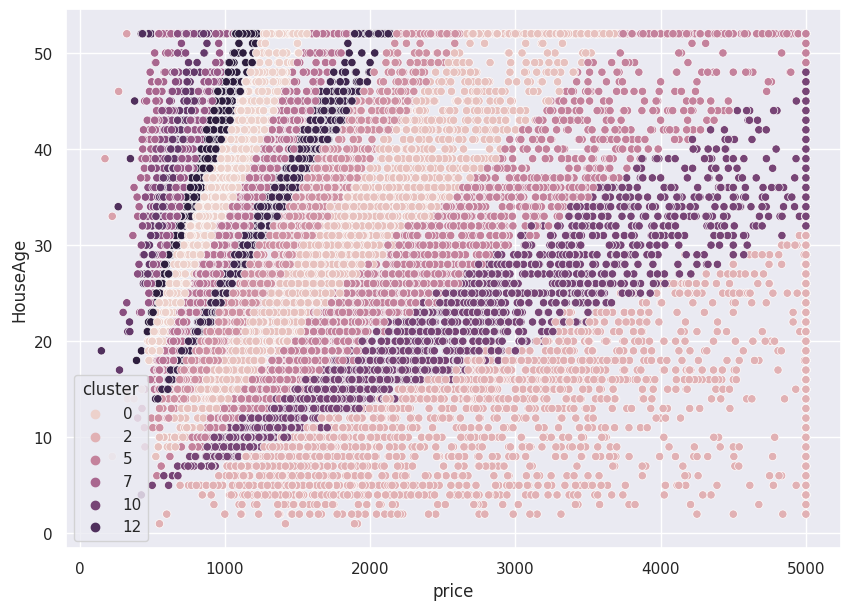

In [ ]:
fig = sns.scatterplot(X_train,x='price',y='HouseAge',hue='cluster')

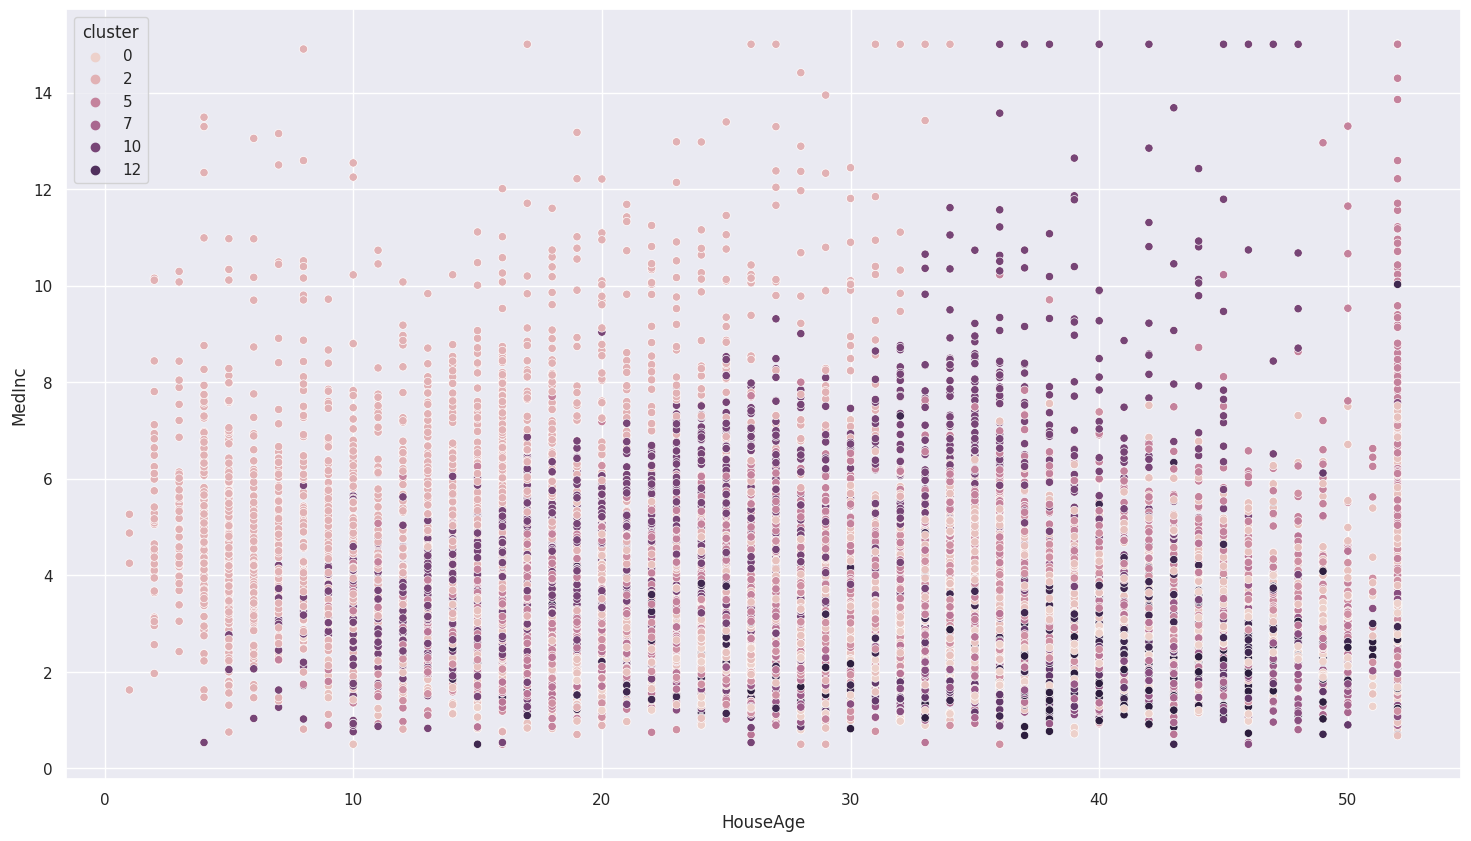

In [ ]:
sns.set(rc={"figure.figsize":(18, 10)})
fig = sns.scatterplot(X_train, x= 'HouseAge', y= 'MedInc', hue = 'cluster')


<Axes: xlabel='Latitude', ylabel='Longitude'>

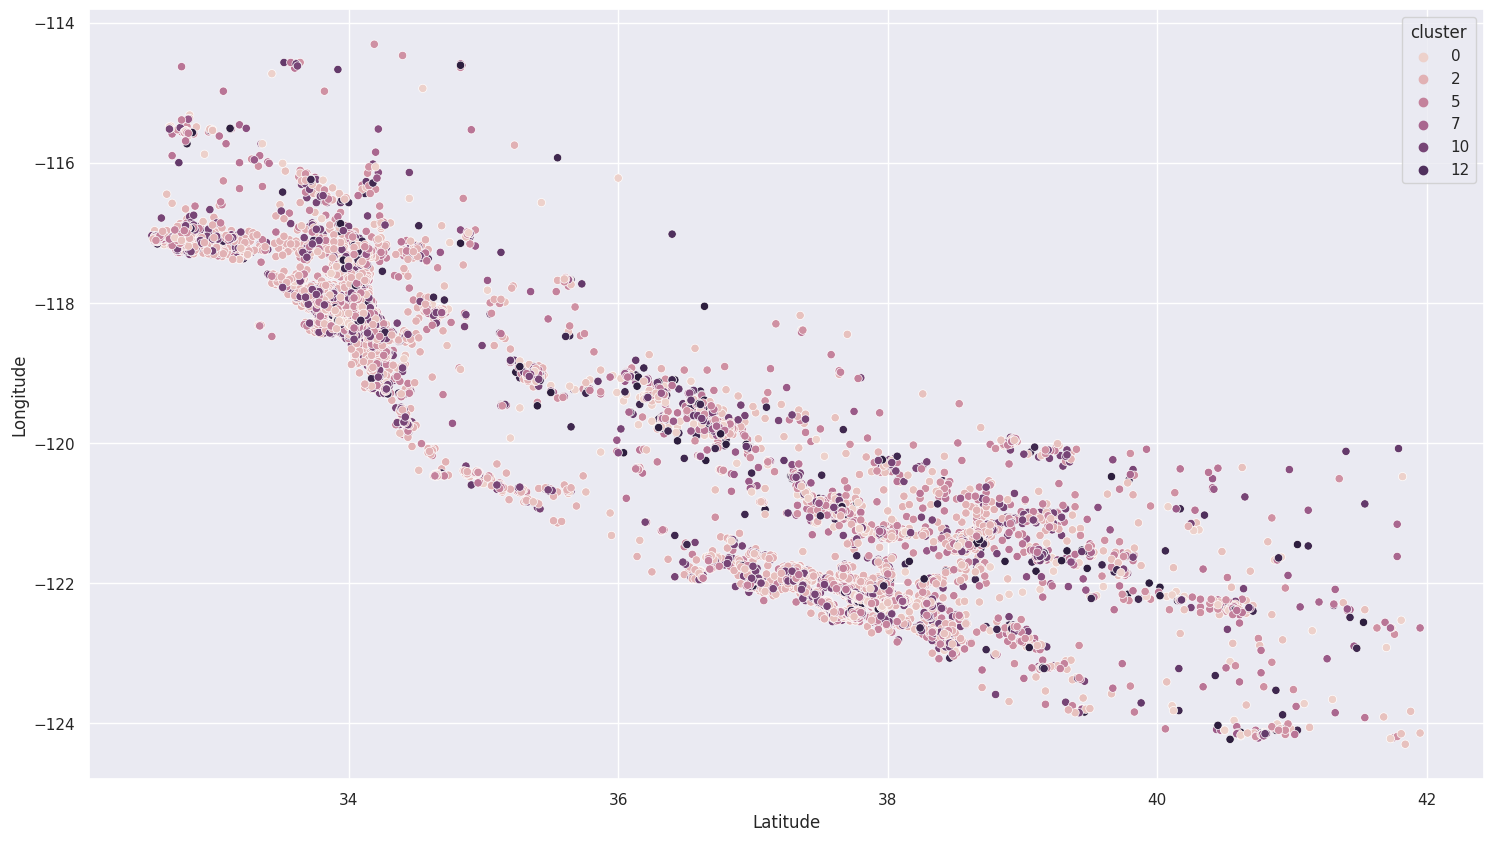

In [ ]:
sns.scatterplot(X_train, x='Latitude',y= 'Longitude',hue='cluster')

##  Predicción con modelos no supervisados

### KNeighbors

In [ ]:
list(data_house.columns)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'price',
 'Lat_bins',
 'Lon_bins',
 'Age_bins',
 'Nueva',
 'Usada',
 'Vieja',
 'Muy vieja']

In [ ]:
#Eliminar las columnas de categorias que no estan en hot-encoding
data_house.drop(['Lat_bins', 'Lon_bins', 'Age_bins'], axis=1, inplace=True)

In [ ]:
data_house

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude   price  Nueva  Usada  Vieja  Muy vieja  
0        -122.23  4526.0      0      0      0          1  
1        -122.22  3585.0      0      1      0          0  
2        -122.24  3521.0      0      0      0          1  
3        -122.25  3413.0      0      0      0          1  
4        -122.25  3422.0      0      0      0          1  
...          ...     ...    ...    ...    ...        ...  
20635    -121.09   781.0      0      1      0          0  
20636    -121.21   771.0      0      1      0          0  
20637    -121.22   923.0      0      1      0          0  
20638    -121.32   847.0      0      1      0          0  
20639    -121.24   894.0      0      1      0          0  

[20640 rows x 13 columns]

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(data_house, df_house_price, test_size=0.33, random_state=1)
# X_normalized = normalize(X_train, norm='l2',axis=1)
# X_normalized_test = normalize(data_house, norm='l2',axis=1)
for clust_size in np.arange(0.1,1,0.1):
  data_normalized = normalize(data_house, norm='l2',axis=1)
  clustering = AgglomerativeClustering(distance_threshold=clust_size, n_clusters= None).fit(data_normalized)
  data_house['cluster'] = clustering.labels_
  #data_normalized = clustering.labels_
  #data_normalized = normalize(data_house, norm='l2',axis=1)
  print('Cantidad de cluster: ' + str(data_house['cluster'].nunique()))

  # modelo predictivo de clasificación
  X_train, X_test, y_train, y_test = train_test_split(data_normalized, clustering.labels_, test_size=0.33, random_state=1)

  predictor_k = KNeighborsClassifier(n_neighbors=data_house['cluster'].nunique(),leaf_size=5)
  # knn_prediction = predictor_k.fit(X_train[['price','HouseAge','MedInc']].values, np.round(y_train.values))
  knn_prediction = predictor_k.fit(X_train, y_train)
  knn_prediction_test = predictor_k.predict(X_test)
  print(clust_size)
  print(predictor_k.score(X_train,y_train))
  print(predictor_k.score(X_test,y_test))

Cantidad de cluster: 375
0.1
0.25997975122938966
0.24133881385789782
Cantidad de cluster: 292
0.2
0.4467746601099219
0.42674691720493246
Cantidad de cluster: 177
0.30000000000000004
0.7659820653746022
0.7563123899001761
Cantidad de cluster: 113
0.4
0.9121347989586347
0.907809747504404
Cantidad de cluster: 84
0.5
0.9418571015331212
0.9346741045214327
Cantidad de cluster: 58
0.6
0.961527335840324
0.9525836758661186
Cantidad de cluster: 52
0.7000000000000001
0.9541509979751229
0.9544920728126834
Cantidad de cluster: 45
0.8
0.9618166039919005
0.9593364650616559
Cantidad de cluster: 38
0.9
0.9725918426381256
0.9696124486200822


In [ ]:
y_test

array([17, 14, 20, ..., 12, 11, 19])

In [ ]:
display(confusion_matrix(y_test, knn_prediction_test))

array([[408,   0,   0, ...,   0,   0,   0],
       [  0, 275,   0, ...,   0,   0,   0],
       [  0,   0, 178, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  42,   0,   0],
       [  0,   0,   0, ...,   0,  43,   0],
       [  0,   0,   0, ...,   0,   0, 122]])

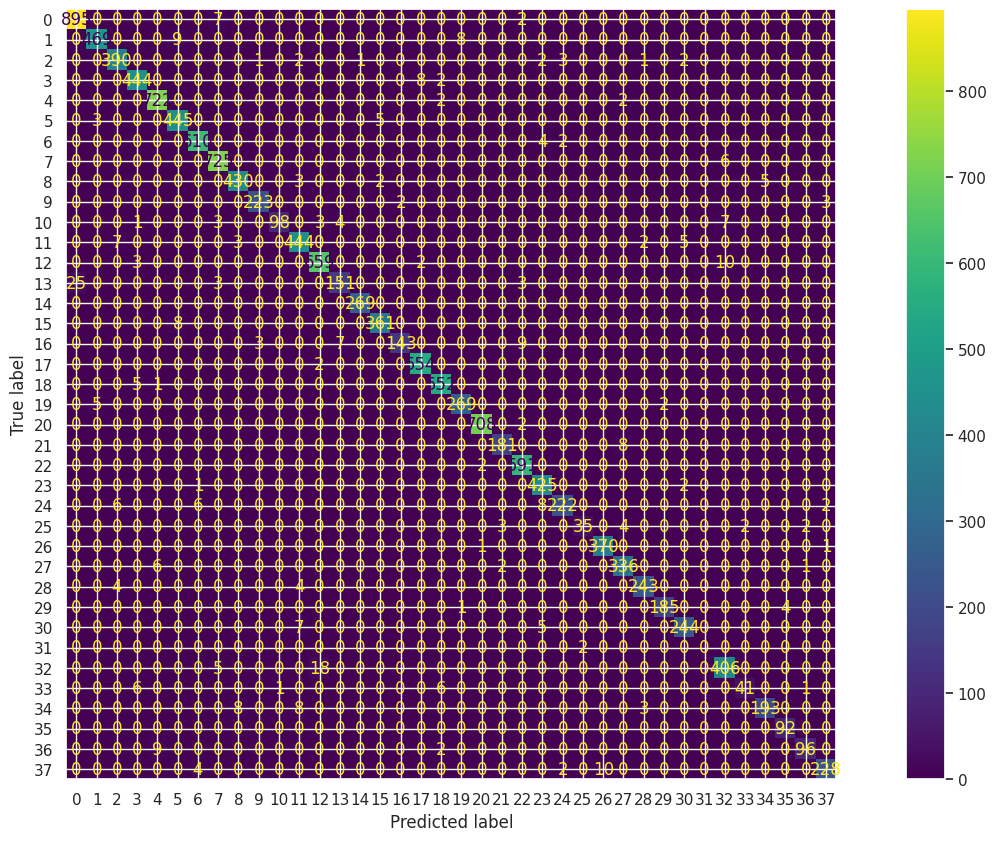

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_prediction, X_train, y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_house, df_house_price, test_size=0.33, random_state=1)
X_normalized = normalize(X_train, norm='l2',axis=1)
X_normalized_test = normalize(X_test, norm='l2',axis=1)
for clust_size in np.arange(0.1,1,0.1):

  clustering = AgglomerativeClustering(distance_threshold=clust_size, n_clusters= None).fit(X_normalized)
  X_train['cluster'] = clustering.labels_
  X_test['cluster'] = clustering.fit_predict(X_normalized_test)

  print('Cantidad de cluster: ' + str(X_train['cluster'].nunique()))
  predictor_k = KNeighborsClassifier(n_neighbors=X_train['cluster'].nunique(),leaf_size=5)
  # knn_prediction = predictor_k.fit(X_train[['price','HouseAge','MedInc']].values, np.round(y_train.values))
  knn_prediction = predictor_k.fit(X_normalized, X_train['cluster'])
  knn_prediction_test = predictor_k.predict(X_normalized_test)
  print(clust_size)
  print(predictor_k.score(X_normalized,X_train['cluster']))
  print(predictor_k.score(X_normalized_test,X_test['cluster']))



Cantidad de cluster: 301
0.1
0.4161845530807058
0.017762771579565472
Cantidad de cluster: 148
0.2
0.8034422910037605
0.0010275983558426305
Cantidad de cluster: 100
0.30000000000000004
0.8842927393693955
0.03288314738696418
Cantidad de cluster: 70
0.4
0.9294908880532253
0.002935995302407516
Cantidad de cluster: 59
0.5
0.9458345386172983
0.0001467997651203758
Cantidad de cluster: 48
0.6
0.9600809950824414
0.012037580739870817
Cantidad de cluster: 38
0.7000000000000001
0.971145501880243
0.010422783323546682
Cantidad de cluster: 32
0.8
0.9781602545559734
0.032736347621843805
Cantidad de cluster: 30
0.9
0.9798235464275383
0.016294773928361716


In [ ]:
predictor_k.score(X_normalized,X_train['cluster'])

KeyError: ignored

In [ ]:
predictor_k.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

## Modelos supervisados

### Regresión para la estimación de precios

In [ ]:
# Creacion del set de datos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(df_housing[['MedInc'
, 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']], df_house_price, test_size=0.33, random_state=1)

In [ ]:
X_train.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  13828.000000  13828.000000  13828.000000  13828.000000  13828.000000   
mean       3.875329     28.516344      5.444420      1.098724   1429.413003   
std        1.888719     12.582294      2.608653      0.511179   1134.923110   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.573200     18.000000      4.446466      1.006190    788.000000   
50%        3.540350     29.000000      5.234350      1.048999   1164.000000   
75%        4.743775     37.000000      6.071493      1.099755   1724.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  13828.000000  13828.000000  13828.000000  
mean       3.127801     35.637836   -119.576286  
std       12.657323      2.134814      2.006663  
min        0.750000     32.540000   -124.300000  
25%        2.429911     33.930000   -121.810000  
50%        2.817759     34.260000   -118.500000  
75%        3.274911     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

In [ ]:
df_house_price.describe()

price
count  20640.000000
mean    2068.558169
std     1153.956159
min      149.990000
25%     1196.000000
50%     1797.000000
75%     2647.250000
max     5000.010000

In [ ]:
# Creación del modelo regresivo
linear_model = LinearRegression()
# Entrenamiento del modelo
linear_model.fit(X_train,y_train)
# Valores del modelo
print('R2 entrenamiento modelo lineal: ' + str(linear_model.score(X_train, y_train)))
# Evaluación del modelo
precios_prediction =  linear_model.predict(X_test)
print('R2 prueba modelo lineal: ' + str(linear_model.score(X_test, y_test)))
print('MSE regresión lineal prueba: ' + str(mean_squared_error(precios_prediction,y_test)))

R2 entrenamiento modelo lineal: 0.6099917646485051
R2 prueba modelo lineal: 0.5975983619028757
MSE regresión lineal prueba: 526380.3029005852


In [ ]:
df_housing['Age_bins'] = pd.cut(df_housing['HouseAge'],[0,12,32,40,100],labels=['Nueva','Usada','Vieja','Muy vieja'])
df_housing = pd.concat([df_housing,pd.get_dummies(df_housing['Age_bins'] )],axis=1, ignore_index=False)

X_train, X_test, y_train, y_test = train_test_split(data_house, df_house_price, test_size=0.33, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(df_housing[['MedInc'
, 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude','Nueva',  'Usada',  'Vieja',  'Muy vieja']], df_house_price, test_size=0.33, random_state=1)

# Creación del modelo regresivo
linear_model = LinearRegression()
# Entrenamiento del modelo
linear_model.fit(X_train,y_train)
# Valores del modelo
print('R2 entrenamiento modelo lineal: ' + str(linear_model.score(X_train, y_train)))
# Evaluación del modelo
precios_prediction =  linear_model.predict(X_test)
print('R2 prueba modelo lineal: ' + str(linear_model.score(X_test, y_test)))
print('MSE regresión lineal prueba: ' + str(mean_squared_error(precios_prediction,y_test)))

R2 entrenamiento modelo lineal: 0.6120597058564581
R2 prueba modelo lineal: 0.5994811652203828
MSE regresión lineal prueba: 523917.4138694717


### Redes neuronales para regresión

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_housing[['MedInc'
, 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']], df_house_price, test_size=0.33, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_housing[['MedInc'
, 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude','Nueva',  'Usada',  'Vieja',  'Muy vieja']], df_house_price, test_size=0.33, random_state=1)

In [ ]:

NN = MLPRegressor(hidden_layer_sizes=(40,20,10,1), activation = 'relu', random_state=1, max_iter=500, early_stopping=True, solver = 'adam')
NN.fit(X_train, y_train)
print('R2 entrenamiento NN relu: ' + str(NN.score(X_train,y_train)))
NN_train = NN.predict(X_train)
NN_test = NN.predict(X_test)
print('R2 prueba NN relu: ' + str(NN.score(X_test,y_test)))
mse_test_train = mean_squared_error(y_train,NN_train)
mse_test_test = mean_squared_error(y_test,NN_test)
print('MSE NN relu entrenamiento: ' + str(mse_test_train))
print('MSE NN relu prueba: ' + str(mse_test_test))

R2 entrenamiento NN relu: 0.6206981459838696
R2 prueba NN relu: 0.6094362454690916
MSE NN relu entrenamiento: 509372.3211176477
MSE NN relu prueba: 510895.2050596501


In [ ]:

NN = MLPRegressor(hidden_layer_sizes=(40,20,10,1), activation = 'tanh', random_state=1, max_iter=500, early_stopping=True, solver = 'adam',verbose=1)
NN.fit(X_train, y_train)
print('R2 entrenamiento NN tanh: ' + str(NN.score(X_train,y_train)))
NN_train = NN.predict(X_train)
NN_test = NN.predict(X_test)
print('R2 prueba NN tanh: ' + str(NN.score(X_test,y_test)))
mse_test_train = mean_squared_error(y_train,NN_train)
mse_test_test = mean_squared_error(y_test,NN_test)
print('MSE NN tanh entrenamiento: ' + str(mse_test_train))
print('MSE NN tanh prueba: ' + str(mse_test_test))

Iteration 1, loss = 2841840.00135151
Validation score: -3.243333
Iteration 2, loss = 2841426.63227446
Validation score: -3.242901
Iteration 3, loss = 2841152.64188284
Validation score: -3.242484
Iteration 4, loss = 2840883.56766724
Validation score: -3.242072
Iteration 5, loss = 2840617.53891208
Validation score: -3.241661
Iteration 6, loss = 2840352.42520231
Validation score: -3.241253
Iteration 7, loss = 2840088.53758177
Validation score: -3.240848
Iteration 8, loss = 2839825.11478226
Validation score: -3.240441
Iteration 9, loss = 2839561.32910076
Validation score: -3.240034
Iteration 10, loss = 2839298.03136929
Validation score: -3.239629
Iteration 11, loss = 2839035.03201053
Validation score: -3.239222
Iteration 12, loss = 2838772.11482952
Validation score: -3.238818
Iteration 13, loss = 2838509.72316984
Validation score: -3.238412
Iteration 14, loss = 2838247.08512232
Validation score: -3.238007
Iteration 15, loss = 2837984.84102910
Validation score: -3.237603
Iteration 16, loss 

In [ ]:
train_dict_relu = {}
for capas in range(10,200,10):
  print('Capas: ' + str(capas))
  NN = MLPRegressor(hidden_layer_sizes=capas, activation = 'relu', random_state=1, max_iter=500, early_stopping=True, solver = 'adam')
  NN.fit(X_train, y_train)
  NN_prediction = NN.predict(X_test)
  train_score = NN.score(X_train,y_train)
  print('Entrenamiento: ' + str(train_score))
  val_score = NN.score(X_test,y_test)
  print('Validación: ' + str(val_score))
  NN_train = NN.predict(X_train)
  NN_test = NN.predict(X_test)
  mse_test_train = mean_squared_error(y_train,NN_train)
  mse_test_test = mean_squared_error(y_test,NN_test)
  print('MSE NN relu entrenamiento: ' + str(mse_test_train))
  print('MSE NN relu prueba: ' + str(mse_test_test))
  train_dict_relu.update({capas:[train_score,val_score,mse_test_train,mse_test_test]})
train_relu_df  = pd.DataFrame.from_dict(train_dict_relu, orient= 'index', columns = ['Entrenamiento', 'Validación','MSE entrenamiento','MSE Validación'])


Capas: 10
Entrenamiento: 0.614452864272472
Validación: 0.5942102981267479
MSE NN relu entrenamiento: 517759.23936675524
MSE NN relu prueba: 530812.2183499311
Capas: 20
Entrenamiento: 0.639863951374237
Validación: 0.6242069285393024
MSE NN relu entrenamiento: 483634.1638310097
MSE NN relu prueba: 491573.72151571495
Capas: 30
Entrenamiento: 0.6495203796697446
Validación: 0.6321384209055958
MSE NN relu entrenamiento: 470666.34613513394
MSE NN relu prueba: 481198.561578579
Capas: 40
Entrenamiento: 0.6422107953327965
Validación: 0.6256752448571472
MSE NN relu entrenamiento: 480482.538438687
MSE NN relu prueba: 489653.0216105261
Capas: 50
Entrenamiento: 0.6562467481320051
Validación: 0.6375030492604326
MSE NN relu entrenamiento: 461633.3665173533
MSE NN relu prueba: 474181.10829056206
Capas: 60
Entrenamiento: 0.6491753399877584
Validación: 0.6338782884542284
MSE NN relu entrenamiento: 471129.7070753194
MSE NN relu prueba: 478922.6463721029
Capas: 70
Entrenamiento: 0.6420788776015799
Validaci

In [ ]:
train_dict_tanh = {}
for capas in range(10,200,10):
  print('Capas: ' + str(capas))
  NN = MLPRegressor(hidden_layer_sizes=capas, activation = 'tanh', random_state=1, max_iter=500, early_stopping=True, solver = 'adam')
  NN.fit(X_train, y_train)
  train_score = NN.score(X_train,y_train)
  print('Entrenamiento: ' + str(train_score))
  val_score = NN.score(X_test,y_test)
  print('Validación: ' + str(val_score))
  NN_train = NN.predict(X_train)
  NN_test = NN.predict(X_test)
  mse_test_train = mean_squared_error(y_train,NN_train)
  mse_test_test = mean_squared_error(y_test,NN_test)
  print('MSE NN tanh entrenamiento: ' + str(mse_test_train))
  print('MSE NN tanh prueba: ' + str(mse_test_test))

  train_dict_tanh.update({capas:[train_score,val_score,mse_test_train,mse_test_test]})
train_tanh_df  = pd.DataFrame.from_dict(train_dict_tanh, orient= 'index', columns = ['Entrenamiento', 'Validación','MSE entrenamiento','MSE Validación'])

Capas: 10
Entrenamiento: -2.2307206789735767
Validación: -2.2281643839494047
MSE NN tanh entrenamiento: 4338601.759277375
MSE NN tanh prueba: 4222751.563019327
Capas: 20
Entrenamiento: -1.5043474543034
Validación: -1.493582413614269
MSE NN tanh entrenamiento: 3363140.101153701
MSE NN tanh prueba: 3261847.224063852
Capas: 30
Entrenamiento: -0.9325613340365773
Validación: -0.9174879077728664
MSE NN tanh entrenamiento: 2595276.669484896
MSE NN tanh prueba: 2508259.83332125
Capas: 40
Entrenamiento: -0.5019085406347683
Validación: -0.48611990300399976
MSE NN tanh entrenamiento: 2016944.1075735337
MSE NN tanh prueba: 1943988.7183089086
Capas: 50
Entrenamiento: -0.21307672593118476
Validación: -0.1999228409256062
MSE NN tanh entrenamiento: 1629065.8773186137
MSE NN tanh prueba: 1569615.2516936415
Capas: 60
Entrenamiento: -0.056143412860590436
Validación: -0.04814001165780257
MSE NN tanh entrenamiento: 1418316.8786173007
MSE NN tanh prueba: 1371068.6154947835
Capas: 70
Entrenamiento: -0.003803

In [ ]:
pd.concat([train_relu_df,train_tanh_df],axis=1, keys=['relu','tanh']).style.background_gradient(cmap='coolwarm', axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_housing[['MedInc'
, 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude','Nueva',  'Usada',  'Vieja',  'Muy vieja']], df_house_price, test_size=0.33, random_state=1)
scaler_X = StandardScaler(with_mean=True, with_std=True)

scaler_X.fit(X_train)

X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


NN = MLPRegressor(hidden_layer_sizes=(40,20,10,1), activation = 'relu', random_state=1, max_iter=500, early_stopping=True, solver = 'adam')
NN.fit(X_train_scaled, y_train)
print('R2 entrenamiento NN relu: ' + str(NN.score(X_train_scaled,y_train)))
NN_train = NN.predict(X_train)
NN_test = NN.predict(X_test)
print('R2 prueba NN relu: ' + str(NN.score(X_test_scaled,y_test)))
mse_test_train = mean_squared_error(y_train,NN_train)
mse_test_test = mean_squared_error(y_test,NN_test)
print('MSE NN relu entrenamiento: ' + str(mse_test_train))
print('MSE NN relu prueba: ' + str(mse_test_test))




R2 entrenamiento NN relu: 0.7744743132637786
R2 prueba NN relu: 0.751632784761316
MSE NN relu entrenamiento: 283401738726.38135
MSE NN relu prueba: 280977114064.85114


In [ ]:
train_dict_relu_scaled = {}
for capas in range(10,200,10):
  print('Capas: ' + str(capas))
  NN = MLPRegressor(hidden_layer_sizes=capas, activation = 'relu', random_state=1, max_iter=500, early_stopping=True, solver = 'adam')
  NN.fit(X_train_scaled, y_train)
  train_score = NN.score(X_train_scaled,y_train)
  train_pred = NN.predict(X_train_scaled)
  mse_train = mean_squared_error(y_train,train_pred)
  print('Entrenamiento: ' + str(train_score))
  print('MSE test: ' + str(mse_train))
  val_score = NN.score(X_test_scaled,y_test)
  test_pred = NN.predict(X_test_scaled)
  mse_test = mean_squared_error(y_test,test_pred)
  print('Validación: ' + str(val_score))
  print('MSE test: ' + str(mse_test))
  train_dict_relu_scaled.update({capas:[train_score,val_score,mse_train,mse_test]})
train_dict_relu_scaled_df  = pd.DataFrame.from_dict(train_dict_relu_scaled, orient= 'index', columns = ['Entrenamiento', 'Validación','MSE entrenamiento','MSE Validación'])

Capas: 10
Entrenamiento: 0.6382025224905159
MSE test: 485865.3311135113
Validación: 0.6178293224475521
MSE test: 499916.24775947223
Capas: 20
Entrenamiento: 0.680164663812016
MSE test: 429513.50183115207
Validación: 0.6576138464779999
MSE test: 447874.2384154441
Capas: 30
Entrenamiento: 0.6912329351944572
MSE test: 414649.6907921628
Validación: 0.6687733908208986
MSE test: 433276.473954978
Capas: 40
Entrenamiento: 0.6977758922054476
MSE test: 405863.0182136537
Validación: 0.6736547663017298
MSE test: 426891.16221439507
Capas: 50
Entrenamiento: 0.7044845738598972
MSE test: 396853.7905766566
Validación: 0.6798074686574267
MSE test: 418842.83183243184
Capas: 60
Entrenamiento: 0.7060661309976747
MSE test: 394729.8847171939
Validación: 0.6824302883838382
MSE test: 415411.9296905549
Capas: 70
Entrenamiento: 0.7073409970862441
MSE test: 393017.8406241504
Validación: 0.6841070013675673
MSE test: 413218.6267695574
Capas: 80
Entrenamiento: 0.7124188897446073
MSE test: 386198.6333295119
Validació

In [ ]:
train_dict_relu_scaled_df.style.background_gradient(cmap='coolwarm', axis=0)

# Modelos para predicción de datos de caracteristicas auto regresivas

# New Section

In [ ]:
# carga de datos
# Usar la URL de los datos crudos
# url = r"https://raw.githubusercontent.com/altair-viz/vega_datasets/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/stocks.csv"
url = r"https://raw.githubusercontent.com/altair-viz/vega_datasets/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/stocks.csv"
stock_data = pd.read_csv(url, sep = ",")

In [ ]:
# conversiones y calidad de datos
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.convert_dtypes().dtypes

symbol            string
date      datetime64[ns]
price            Float64
dtype: object

In [ ]:
# exploración de datos
stock_data.groupby(['symbol']).describe()

price                                                            \
        count        mean         std     min      25%     50%      75%   
symbol                                                                    
AAPL    123.0   64.730488   63.123782    7.07   11.155   36.81  102.460   
AMZN    123.0   47.987073   28.891321    5.97   29.405   41.50   65.895   
GOOG     68.0  415.870441  135.069851  102.37  338.395  420.46  503.625   
IBM     123.0   91.261220   16.513365   53.01   77.365   88.70  101.945   
MSFT    123.0   24.736748    4.303958   15.81   21.760   24.11   27.295   

                
           max  
symbol          
AAPL    223.02  
AMZN    135.91  
GOOG    707.00  
IBM     130.32  
MSFT     43.22

In [ ]:
ts_values = stock_data['price'][stock_data['symbol'] == 'AMZN'].values
ts = pd.Series(ts_values)
ts

0       64.56
1       68.87
2       67.00
3       55.19
4       48.31
        ...  
118    135.91
119    134.52
120    125.41
121    118.40
122    128.82
Length: 123, dtype: float64

<Axes: >

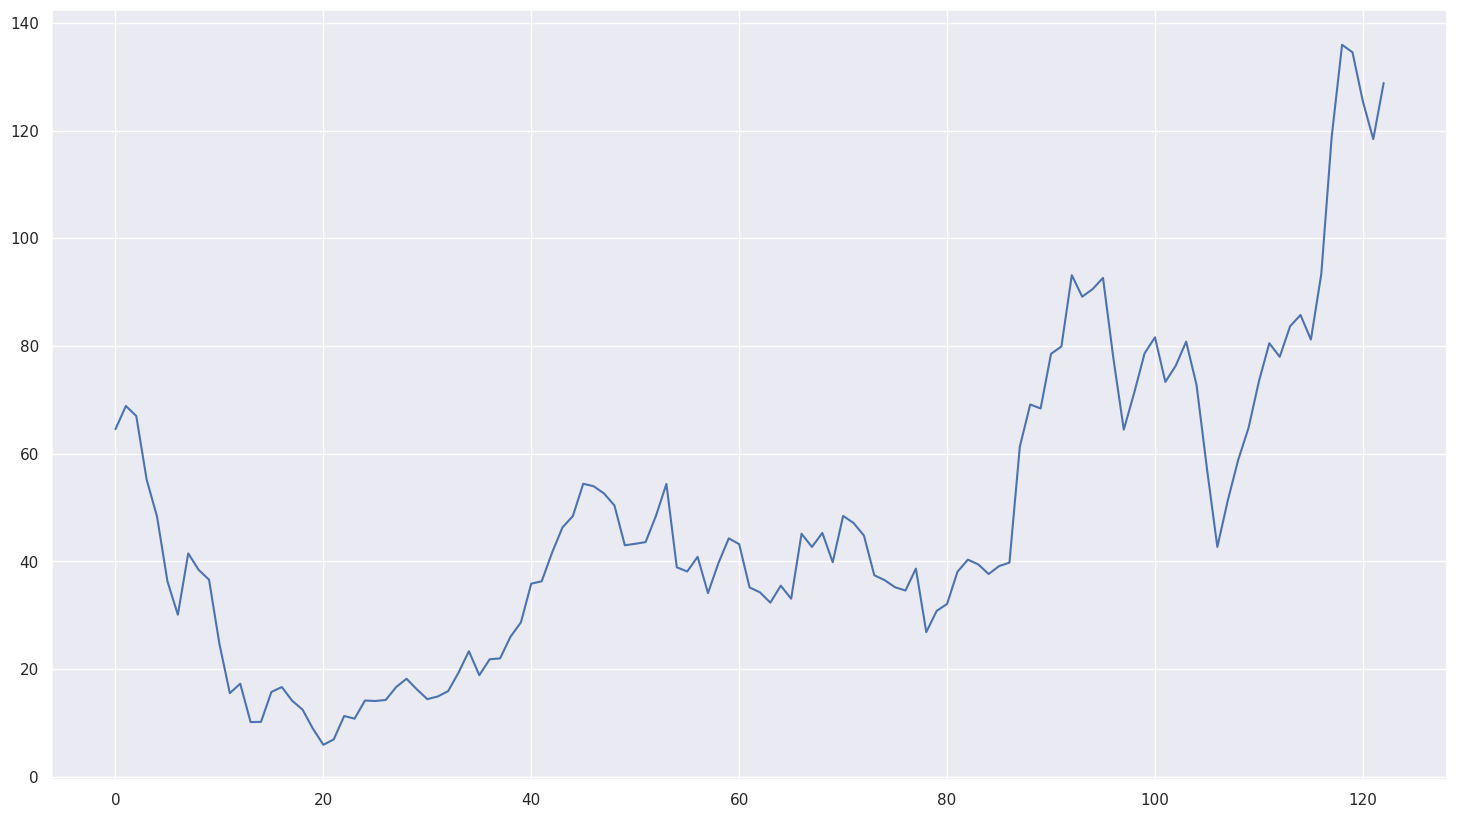

In [ ]:
ts.plot()


In [ ]:
#datos de entrenamiento y prueba
longitud = len(ts)
print(longitud)
train_idx = int(np.floor(longitud*0.7))
train_idx
longitud = len(ts)
y_train = ts[0:train_idx]
x_train = np.arange(0,len(y_train))
y_test = ts[train_idx:-1]
x_test =  np.arange(0,len(y_test))


123


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor



regr_1 =  AdaBoostRegressor(DecisionTreeRegressor(max_depth=300),n_estimators=300)
regr_1.fit(x_train.reshape(-1, 1),y_train.values)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=300),
                  n_estimators=300)

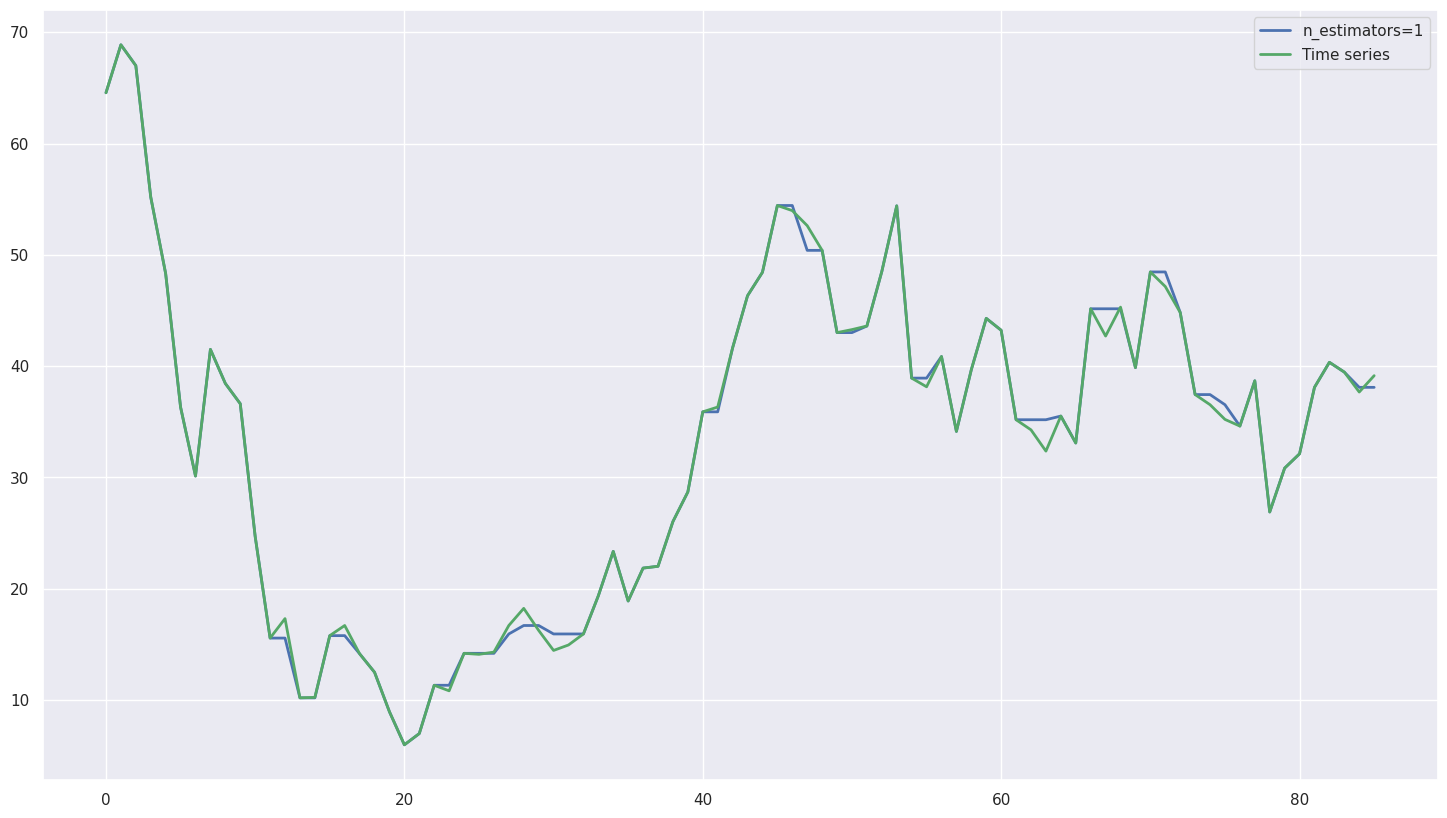

In [ ]:
y1 = regr_1.predict(x_train.reshape(-1, 1))
# np.arange(0,len(y_train)
plt.plot(x_train, y1, c="b", label="n_estimators=1", linewidth=2)
plt.plot(x_train,y_train, c="g", label="Time series", linewidth=2)
plt.legend()

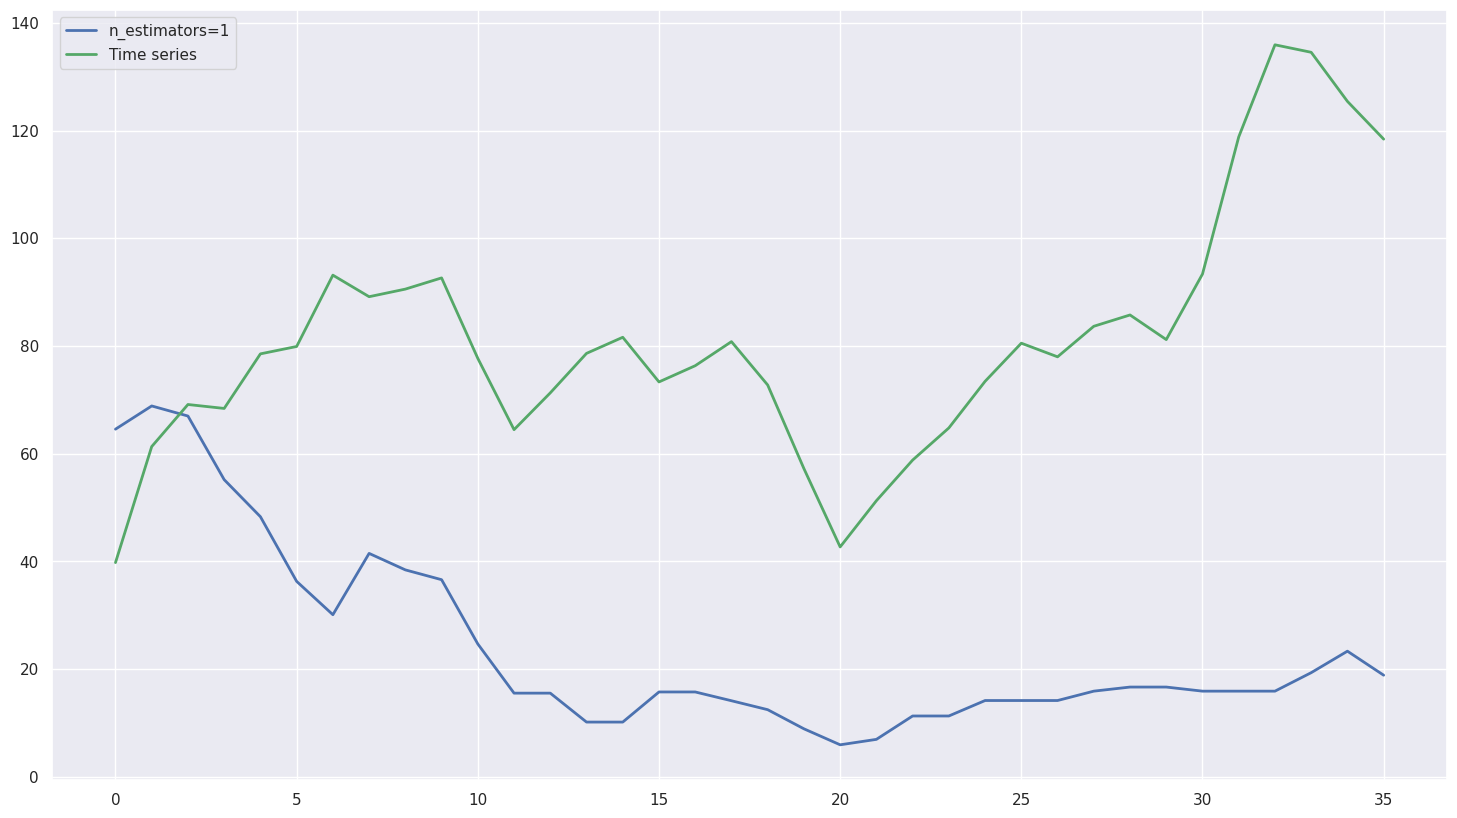

In [ ]:
y1_val = regr_1.predict(x_test.reshape(-1, 1))
plt.plot(x_test, y1_val, c="b", label="n_estimators=1", linewidth=2)
plt.plot(x_test,y_test, c="g", label="Time series", linewidth=2)
plt.legend()